USES EXTENDED WOD13 DATA

This notebook attempts to determine the source of the 33.9psu, 6.3$^\circ C$ water that was found in the 2013 Falkor Cruise around MB07 and LB08.

In [5]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sets import Set
import calendar
import seaborn as sns
import csvWOD
import copy

# switch to unbuffered output
class Unbuffered(object):
    def __init__(self, stream):
        self.stream = stream
    def write(self, data):
        self.stream.write(data)
        self.stream.flush()
    def __getattr__(self, attr):
        return getattr(self.stream, attr)

import sys
sys.stdout = Unbuffered(sys.stdout)

sns.set()

%matplotlib inline

Go get a coffee, read a book. Takes roughly 22min

In [6]:
cast_inf = []

FILES = ['../../5_WOD13_Data/WOD13_003/ocldb1432234261.31629.CTD.csv', \
         '../../5_WOD13_Data/WOD13_003/ocldb1432234261.31629.CTD2.csv', \
         '../../5_WOD13_Data/WOD13_003/ocldb1432234261.31629.CTD3.csv', \
         '../../5_WOD13_Data/WOD13_003/ocldb1432234261.31629.OSD.csv', \
         '../../5_WOD13_Data/WOD13_003/ocldb1432234261.31629.OSD2.csv', \
         '../../5_WOD13_Data/WOD13_003/ocldb1432234261.31629.OSD3.csv', \
         '../../5_WOD13_Data/WOD13_003/ocldb1432234261.31629.OSD4.csv', \
         '../../5_WOD13_Data/WOD13_003/ocldb1432234261.31629.OSD5.csv', \
         '../../5_WOD13_Data/WOD13_003/ocldb1432234261.31629.OSD6.csv', \
         '../../5_WOD13_Data/WOD13_003/ocldb1432234261.31629.OSD7.csv', \
         '../../5_WOD13_Data/WOD13_003/ocldb1432329115.25329.CTD.csv' \
        ]

for fn in FILES:
    print '-----------------------------------------------------------------'
    print fn
    print '-----------------------------------------------------------------'
    print '> Parsing'
    tmp_casts = []
    tmp_casts = csvWOD.csvWOD_readcasts(fn)
    print '> Done parsing'
    print '> Regionally filtering'
    tmp_casts = csvWOD.csvWOD_filter_region(tmp_casts,-160,-120,15,60)
    print '> Done filtering'
    print '> Appending new casts'
    cast_inf.extend(tmp_casts)
    print '> Done' 
    print ''
    
print 'Total casts: ', len(cast_inf)

-----------------------------------------------------------------
../../5_WOD13_Data/WOD13_003/ocldb1432234261.31629.CTD.csv
-----------------------------------------------------------------
> Parsing
> Done parsing
> Regionally filtering
> Done filtering
> Appending new casts
> Done

-----------------------------------------------------------------
../../5_WOD13_Data/WOD13_003/ocldb1432234261.31629.CTD2.csv
-----------------------------------------------------------------
> Parsing
> Done parsing
> Regionally filtering
> Done filtering
> Appending new casts
> Done

-----------------------------------------------------------------
../../5_WOD13_Data/WOD13_003/ocldb1432234261.31629.CTD3.csv
-----------------------------------------------------------------
> Parsing
> Done parsing
> Regionally filtering
> Done filtering
> Appending new casts
> Done

-----------------------------------------------------------------
../../5_WOD13_Data/WOD13_003/ocldb1432234261.31629.OSD.csv
---------------

In [31]:
def get_EW_info(cast_inf,EPS=0.05):
    lats = []
    lons = []
    yrs = Set([])

    EW_T0 = 6.3
    EW_T0_eps = EPS
    EW_S0 = 33.9
    EW_S0_eps = EPS
    
    ALL = {'lats' : [], 'lons' : [], 'yrs' : Set([]), 'dpths' : []}
    EW_T = {'lats' : [], 'lons' : [], 'dpths' : []}
    EW_S = {'lats' : [], 'lons' : [], 'dpths' : []}
    EW_TS = {'lats' : [], 'lons' : [], 'dpths' : []}
    
    for cast in cast_inf:
        if 'Temperatur' in cast['Variables'] and 'Salinity' in cast['Variables'] and 'Depth' in cast:
            for ii in range(0,len(cast['Depth'])):
                ALL['lats'].append(cast['Latitude'])
                ALL['lons'].append(cast['Longitude'])    
                ALL['yrs'].add(cast['Year'])
                ALL['dpths'].append(cast['Depth'][ii])
                if cast['Temperatur'][ii] > EW_T0-EW_T0_eps and cast['Temperatur'][ii] < EW_T0+EW_T0_eps:
                    EW_T['lats'].append(cast['Latitude'])
                    EW_T['lons'].append(cast['Longitude'])
                    EW_T['dpths'].append(cast['Depth'][ii])
                if cast['Salinity'][ii] > EW_S0-EW_S0_eps and cast['Salinity'][ii] < EW_S0+EW_S0_eps:
                    EW_S['lats'].append(cast['Latitude'])
                    EW_S['lons'].append(cast['Longitude'])
                    EW_S['dpths'].append(cast['Depth'][ii])
                if cast['Temperatur'][ii] > EW_T0-EW_T0_eps and cast['Temperatur'][ii] < EW_T0+EW_T0_eps and \
                   cast['Salinity'][ii] > EW_S0-EW_S0_eps and cast['Salinity'][ii] < EW_S0+EW_S0_eps:
                    EW_TS['lats'].append(cast['Latitude'])
                    EW_TS['lons'].append(cast['Longitude'])
                    EW_TS['dpths'].append(cast['Depth'][ii])
    return (ALL,EW_T,EW_S,EW_TS)

In [155]:
def plot_dat(title_str,all_filt):
    plt.figure(figsize=(12,12))

    sns.set_style("darkgrid")
    sns.set_context("poster")
    
    plt.plot(all_filt['ALL']['lons'],all_filt['ALL']['lats'],'.k',ms=1)
    #plt.plot(all_filt['EW_T']['lons'],all_filt['EW_T']['lats'],'.r',ms=10,label='T matches eddy water')
    #plt.plot(all_filt['EW_S']['lons'],all_filt['EW_S']['lats'],'.b',ms=10,label='S matches eddy water')
    plt.plot(all_filt['EW_TS']['lons'],all_filt['EW_TS']['lats'],'.g',ms=15,label='T&S matches eddy water')
    #plt.ylim((40,55))
    #plt.xlim((-135,-110))
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.title(title_str)
    plt.show()

    print "TOTAL CASTS AVAILABLE : ", str(len(all_filt['ALL']['lats']))
    print "YEARS AVAILABLE       : ", str(min(all_filt['ALL']['yrs'])), "---", str(max(all_filt['ALL']['yrs']))
    
    for ss in ['EW_TS']: #['EW_T','EW_S','EW_TS']:
        print "========================================"
        print ss
        print "========================================"
        print "  FRACTION ", ss, " MATCH  : ", str(float(len(all_filt[ss]['lats']))/float(len(all_filt['ALL']['lats'])))
        print "MEAN DEPTH ", ss, " MATCH  : ", str(np.mean(all_filt[ss]['dpths'])), 'm'
        print " MIN DEPTH ", ss, " MATCH  : ", str(np.min(all_filt[ss]['dpths'])), 'm'
        print " MAX DEPTH ", ss, " MATCH  : ", str(np.max(all_filt[ss]['dpths'])), 'm'
        print " STD DEPTH ", ss, " MATCH  : ", str(np.std(all_filt[ss]['dpths']))

Initial Investigation
============

Look at fractional matching of EW with all cast data from NOAA.

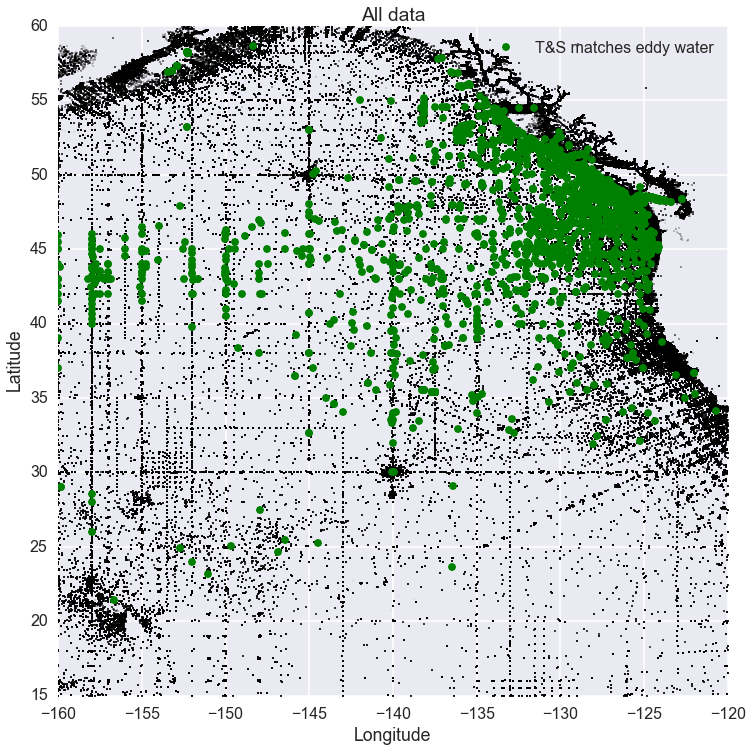

TOTAL CASTS AVAILABLE :  5778871
YEARS AVAILABLE       :  1875 --- 2014
EW_TS
  FRACTION  EW_TS  MATCH  :  0.00056481620718
MEAN DEPTH  EW_TS  MATCH  :  242.783394608 m
 MIN DEPTH  EW_TS  MATCH  :  10.0 m
 MAX DEPTH  EW_TS  MATCH  :  600.0 m
 STD DEPTH  EW_TS  MATCH  :  77.5897603617


In [156]:
# all months, all years
all_filt = {}
ALL,EW_T,EW_S,EW_TS = get_EW_info(cast_inf)
all_filt['ALL'] = copy.copy(ALL)
all_filt['EW_T'] = copy.copy(EW_T)
all_filt['EW_S'] = copy.copy(EW_S)
all_filt['EW_TS'] = copy.copy(EW_TS)

plot_dat('All data',all_filt)

In [157]:
# WE SEE THAT THE BASE FRACTION OF EW MATCHING IS 0.000567649795358, SET A VAR
base_frac_EW = 0.000567649795358

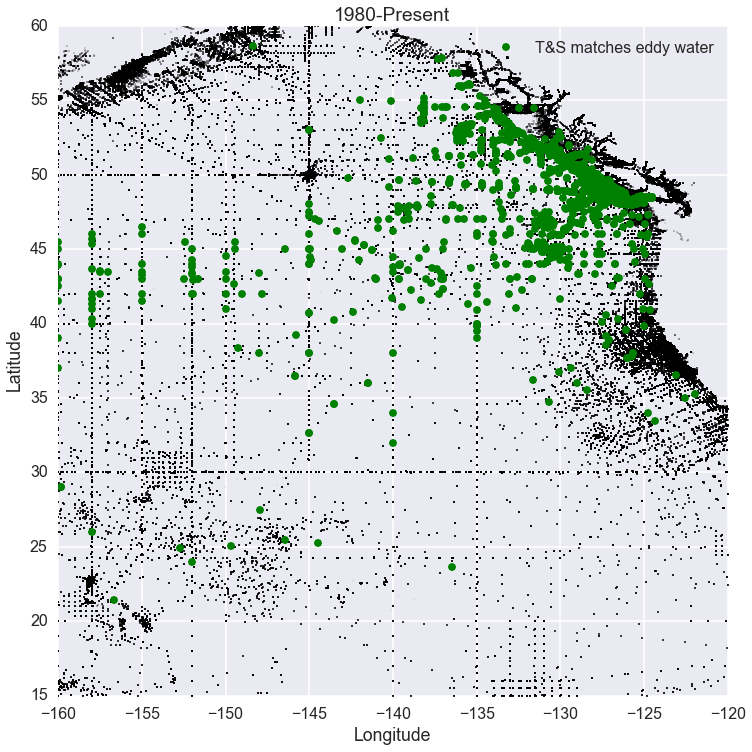

TOTAL CASTS AVAILABLE :  3193246
YEARS AVAILABLE       :  1980 --- 2014
EW_TS
  FRACTION  EW_TS  MATCH  :  0.00059563215612
MEAN DEPTH  EW_TS  MATCH  :  241.679810726 m
 MIN DEPTH  EW_TS  MATCH  :  60.0 m
 MAX DEPTH  EW_TS  MATCH  :  600.0 m
 STD DEPTH  EW_TS  MATCH  :  64.8082507175


In [158]:
# 1980-Present all months
yr_filt = {}
ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_year(cast_inf,1980,2015))
yr_filt['ALL'] = copy.copy(ALL)
yr_filt['EW_T'] = copy.copy(EW_T)
yr_filt['EW_S'] = copy.copy(EW_S)
yr_filt['EW_TS'] = copy.copy(EW_TS)

plot_dat('1980-Present',yr_filt)

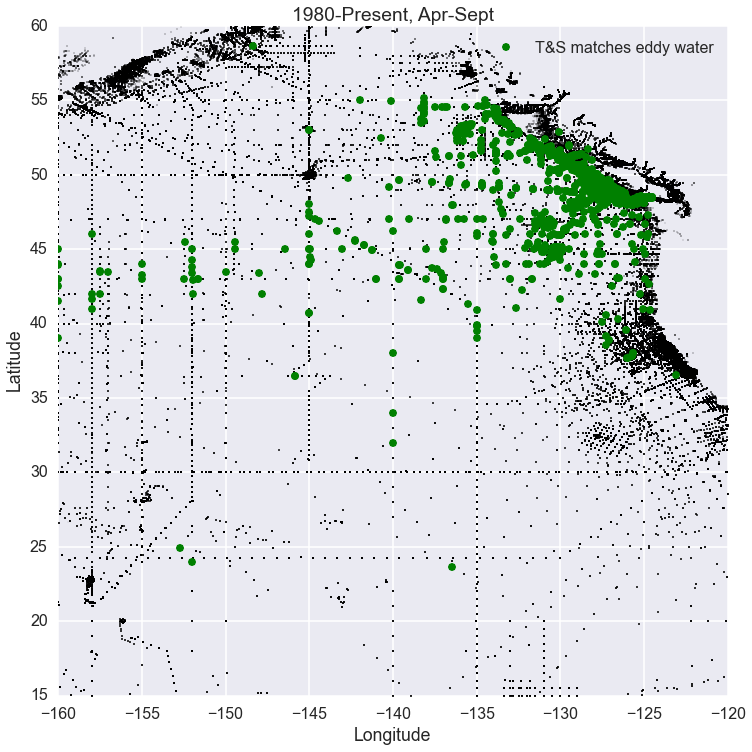

TOTAL CASTS AVAILABLE :  2009000
YEARS AVAILABLE       :  1980 --- 2014
EW_TS
  FRACTION  EW_TS  MATCH  :  0.000739173718268
MEAN DEPTH  EW_TS  MATCH  :  234.292929293 m
 MIN DEPTH  EW_TS  MATCH  :  60.0 m
 MAX DEPTH  EW_TS  MATCH  :  550.0 m
 STD DEPTH  EW_TS  MATCH  :  58.5323161813


In [159]:
# 1980-Present, April-September
yr_filt = {}
ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_month(csvWOD.csvWOD_filter_year(cast_inf,1980,2015),4,9))
yr_filt['ALL'] = copy.copy(ALL)
yr_filt['EW_T'] = copy.copy(EW_T)
yr_filt['EW_S'] = copy.copy(EW_S)
yr_filt['EW_TS'] = copy.copy(EW_TS)

plot_dat('1980-Present, Apr-Sept',yr_filt)

WCVI, WCUS and Eddy Region (ER)
===================

Let's add in the eddy region to the previous analysis

Note MB07 coords: (from HowMuchOfEach.ipynb)

48  28.20000 N  (deg min)
125  19.49000 W  (deg min)

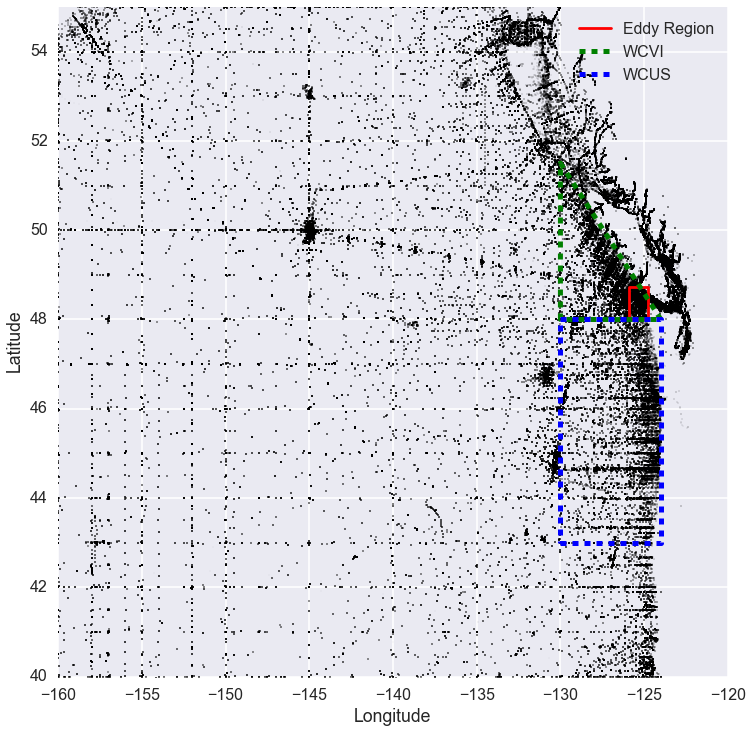

In [37]:
plt.figure(figsize=(12,12))

sns.set_style("darkgrid")
sns.set_context("poster")

# move the centre down just a touch so region doesn't intersect with VI too much
MB07 = [-(125 + 19.49/60.0),48+28.2/60.0-0.1] 

ERdelx = 0.55
ERdely = 0.35
ER_x = [MB07[0]-ERdelx,MB07[0]+ERdelx,MB07[0]+ERdelx,MB07[0]-ERdelx,MB07[0]-ERdelx]
ER_y = [MB07[1]-ERdely,MB07[1]-ERdely,MB07[1]+ERdely,MB07[1]+ERdely,MB07[1]-ERdely]

WCVI_lnmin = -130
WCVI_lnmax = -124
WCVI_ltmin =  48
WCVI_ltmax =  51.5

WCUS_lnmin = -130
WCUS_lnmax = -124
WCUS_ltmin =  43
WCUS_ltmax =  48


plt.plot(all_filt['ALL']['lons'],all_filt['ALL']['lats'],'.k',ms=2,alpha=0.1)
plt.plot(ER_x,ER_y,'-r',label='Eddy Region')
plt.plot([WCVI_lnmax,WCVI_lnmin,WCVI_lnmin,WCVI_lnmax],[WCVI_ltmin,WCVI_ltmax,WCVI_ltmin,WCVI_ltmin],'--g',label='WCVI',lw=5)
plt.plot([WCUS_lnmin,WCUS_lnmax,WCUS_lnmax,WCUS_lnmin,WCUS_lnmin],[WCUS_ltmin,WCUS_ltmin,WCUS_ltmax,WCUS_ltmax,WCUS_ltmin],'--b',label='WCUS',lw=5)
plt.ylim((40,55))
plt.xlim((-160,-120))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

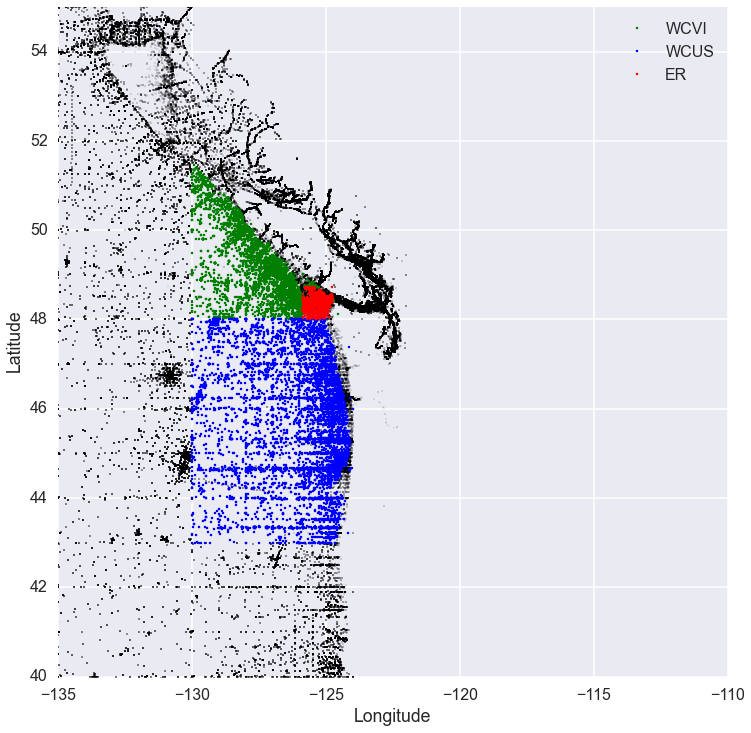

In [38]:
WCVI_cinf = []
WCUS_cinf = []
ER_cinf = []

WCVI_slope = float(WCVI_ltmin-WCVI_ltmax)/float(WCVI_lnmax-WCVI_lnmin)
WCVI_int   = WCVI_ltmax - WCVI_slope*WCVI_lnmin #y - mx

for cast in cast_inf:
    lt = cast['Latitude']
    ln = cast['Longitude']
    
    # only keep casts with depth info
    if 'Depth' not in cast:
        continue
        
    # only keep deep casts that include points in the range of interest
    if max(cast['Depth']) < 100 or min(cast['Depth']) > 250:
        continue
    
    # ER
    if ln >= min(ER_x) and ln <= max(ER_x) and lt >= min(ER_y) and lt <= max(ER_y):
        ER_cinf.append(cast)
    # WCUS
    elif ln >= WCUS_lnmin and ln <= WCUS_lnmax and lt >= WCUS_ltmin and lt <= WCUS_ltmax:
        WCUS_cinf.append(cast)
    # WCVI
    elif ln >= WCVI_lnmin and  ln <= WCVI_lnmax and \
       lt >= WCVI_ltmin and lt <= WCVI_slope*ln + WCVI_int:
        WCVI_cinf.append(cast)
    
        
ER_lon = [k['Longitude'] for k in ER_cinf]
ER_lat = [k['Latitude'] for k in ER_cinf]

WCVI_lon = [k['Longitude'] for k in WCVI_cinf]
WCVI_lat = [k['Latitude'] for k in WCVI_cinf]

WCUS_lon = [k['Longitude'] for k in WCUS_cinf]
WCUS_lat = [k['Latitude'] for k in WCUS_cinf]

plt.figure(figsize=(12,12))

sns.set_style("darkgrid")
sns.set_context("poster")

plt.plot(all_filt['ALL']['lons'],all_filt['ALL']['lats'],'.k',ms=2,alpha=0.1)
plt.plot(WCVI_lon,WCVI_lat,'.g',ms=5,label='WCVI')
plt.plot(WCUS_lon,WCUS_lat,'.b',ms=5,label='WCUS')
plt.plot(ER_lon,ER_lat,'.r',ms=5,label='ER')
plt.ylim((40,55))
plt.xlim((-135,-110))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [39]:
mnthER_filt = [[] for k in range(1,13)]
mnthWCVI_filt = [[] for k in range(1,13)]
mnthWCUS_filt = [[] for k in range(1,13)]

MIN_YEAR = 1970
MAX_YEAR = 2015

# look at monthly values/percentages/stats for each month
for ii in range(1,13):
    ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_month(csvWOD.csvWOD_filter_year(ER_cinf,MIN_YEAR,MAX_YEAR),ii),EPS=0.05)
    mnthER_filt[ii-1] = copy.copy(EW_TS)
    mnthER_filt[ii-1]['count'] = len(ALL['lats'])
    mnthER_filt[ii-1]['match_perc'] = float(len(EW_TS['lats']))/float(len(ALL['lats']))
    
    ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_month(csvWOD.csvWOD_filter_year(WCVI_cinf,MIN_YEAR,MAX_YEAR),ii),EPS=0.05)
    mnthWCVI_filt[ii-1] = copy.copy(EW_TS)
    mnthWCVI_filt[ii-1]['count'] = len(ALL['lats'])
    mnthWCVI_filt[ii-1]['match_perc'] = float(len(EW_TS['lats']))/float(len(ALL['lats']))

    ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_month(csvWOD.csvWOD_filter_year(WCUS_cinf,MIN_YEAR,MAX_YEAR),ii),EPS=0.05)
    mnthWCUS_filt[ii-1] = copy.copy(EW_TS)
    mnthWCUS_filt[ii-1]['count'] = len(ALL['lats'])
    mnthWCUS_filt[ii-1]['match_perc'] = float(len(EW_TS['lats']))/float(len(ALL['lats']))

The following plot looks at fractional casts that contain EW values of Salinity and temperature. Data is taken from 1970-present so that instrumentation is consistent and the dataset is still large.

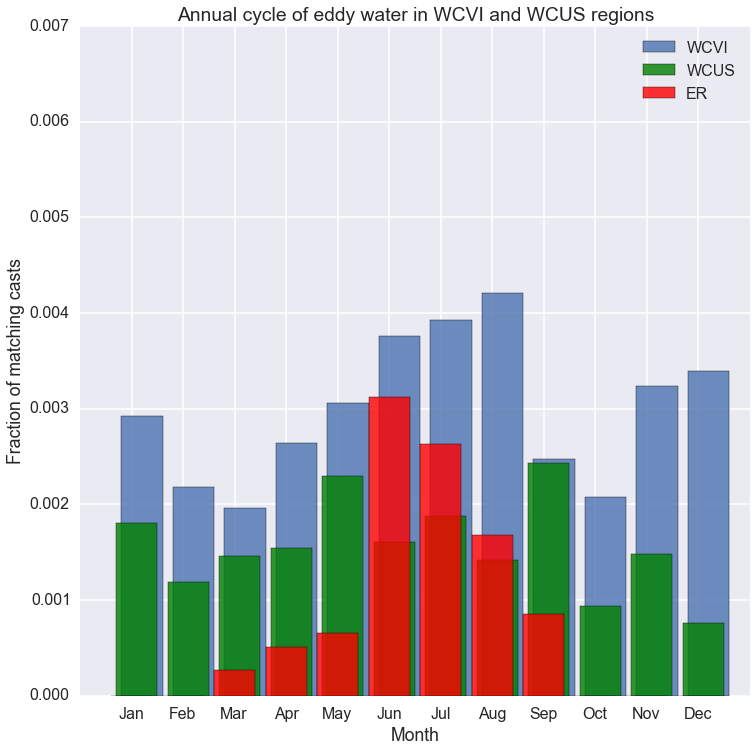

Correlation coefficients for mean EW freq
Corr(WCUS,WCVI)[Jan-Dec] :  0.0967477300508
Corr(ER,  WCVI)[Mar-Sep] :  0.806304307448
Corr(ER,  WCUS)[Mar-Sep] :  -0.162009427691


In [40]:
plt.figure(figsize=(12,12))

plt.bar(np.arange(1,13)-0.2, [k['match_perc'] for k in mnthWCVI_filt], label='WCVI',alpha=0.8)
plt.bar(np.arange(1,13)-0.3, [k['match_perc'] for k in mnthWCUS_filt], label='WCUS',color='g',alpha=0.8)
plt.bar(np.arange(1,13)-0.4, [k['match_perc'] for k in mnthER_filt], label='ER',alpha=0.8,color='r')

plt.xlim((0,13))
plt.ylim((0,.007))

plt.xticks(np.arange(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()

plt.xlabel('Month')
plt.ylabel('Fraction of matching casts')
plt.title('Annual cycle of eddy water in WCVI and WCUS regions')
plt.show()


## ALSO LOOK AT THE CORRELATION BETWEEN CURVES
WCVI_freq = [k['match_perc'] for k in mnthWCVI_filt] 
WCUS_freq = [k['match_perc'] for k in mnthWCUS_filt]
ER_freq = [k['match_perc'] for k in mnthER_filt]

print "Correlation coefficients for mean EW freq"
print "==========================================="
print "Corr(WCUS,WCVI)[Jan-Dec] : ", np.corrcoef(WCUS_freq,WCVI_freq)[1,0]
print "Corr(ER,  WCVI)[Mar-Sep] : ", np.corrcoef(ER_freq[2:9],WCVI_freq[2:9])[1,0]
print "Corr(ER,  WCUS)[Mar-Sep] : ", np.corrcoef(ER_freq[2:9],WCUS_freq[2:9])[1,0]

Interestingly, the trend between ER and WCVI fractional matching seems significant ($r^2 = 0.74$), while the other correlations are relatively insignificant.

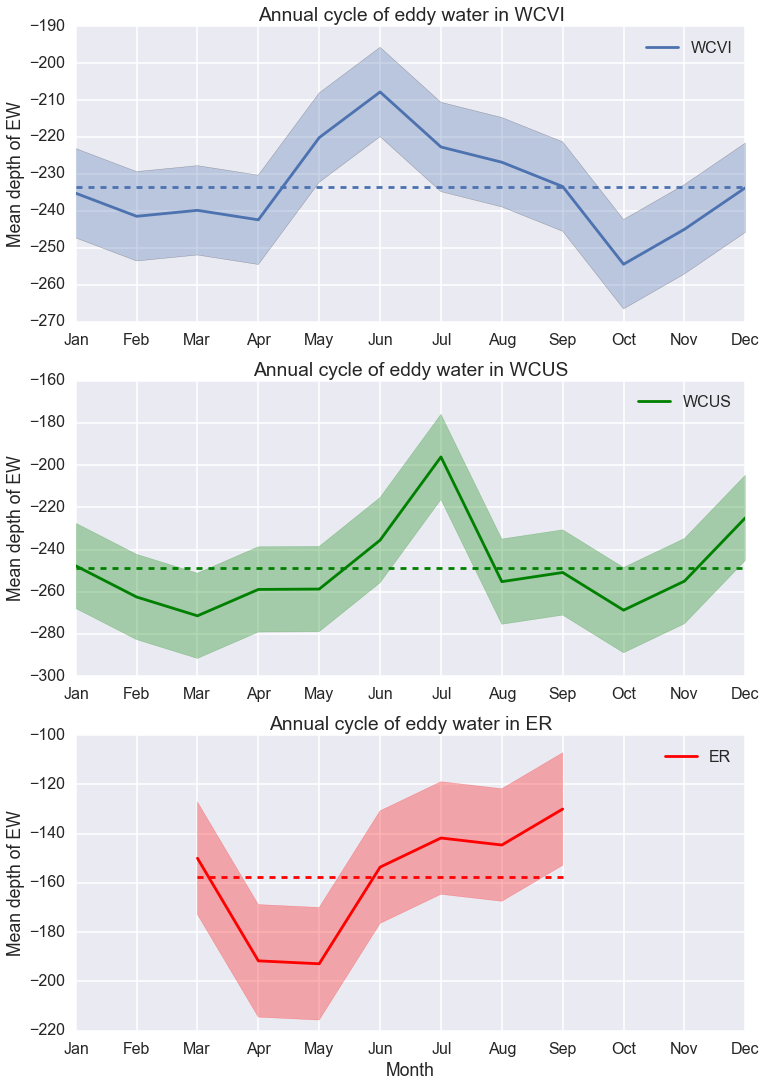

In [41]:
plt.figure(figsize=(12,18))

meanWCVI = np.nanmean([-np.mean(k['dpths']) for k in mnthWCVI_filt])
meanWCUS = np.nanmean([-np.mean(k['dpths']) for k in mnthWCUS_filt])
meanER = np.nanmean([-np.mean(k['dpths']) for k in mnthER_filt])
stdWCVI = np.nanstd([-np.mean(k['dpths']) for k in mnthWCVI_filt])
stdWCUS = np.nanstd([-np.mean(k['dpths']) for k in mnthWCUS_filt])
stdER = np.nanstd([-np.mean(k['dpths']) for k in mnthER_filt])

plt.subplot(3,1,1)
plt.plot(np.arange(1,13), [-np.mean(k['dpths']) for k in mnthWCVI_filt], label='WCVI')
plt.gca().set_color_cycle(None)
plt.fill_between(np.arange(1,13),[-np.mean(k['dpths']) for k in mnthWCVI_filt]-stdWCVI,[-np.mean(k['dpths']) for k in mnthWCVI_filt]+stdWCVI,alpha=0.3)
plt.gca().set_color_cycle(None)
plt.plot(np.arange(1,13), [meanWCVI for k in range(1,13)],'--')
plt.xlim((1,12))
plt.xticks(np.arange(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()

plt.ylabel('Mean depth of EW')
plt.title('Annual cycle of eddy water in WCVI')

plt.subplot(3,1,2)
plt.plot(np.arange(1,13), [-np.mean(k['dpths']) for k in mnthWCUS_filt], label='WCUS',color='g')
plt.fill_between(np.arange(1,13),[-np.mean(k['dpths']) for k in mnthWCUS_filt]-stdWCUS,[-np.mean(k['dpths']) for k in mnthWCUS_filt]+stdWCUS,color='g',alpha=0.3)
plt.plot(np.arange(1,13), [meanWCUS for k in range(1,13)],'--g')

plt.xlim((1,12))
plt.xticks(np.arange(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()

plt.ylabel('Mean depth of EW')
plt.title('Annual cycle of eddy water in WCUS')

plt.subplot(3,1,3)
plt.plot(np.arange(1,13), [-np.mean(k['dpths']) for k in mnthER_filt], label='ER',color='r')
plt.fill_between(np.arange(1,13),[-np.mean(k['dpths']) for k in mnthER_filt]-stdER,[-np.mean(k['dpths']) for k in mnthER_filt]+stdER,color='r',alpha=0.3)
plt.plot(np.arange(3,10), [meanER for k in range(3,10)],'--r')

plt.xlim((1,12))
plt.xticks(np.arange(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()

plt.xlabel('Month')
plt.ylabel('Mean depth of EW')
plt.title('Annual cycle of eddy water in ER')
plt.show()

In the region around Spur canyon, the depths approach 300m going into JdF canyon, but are much shallower around the shelf break, which is approximately 200m. Most of ER defined here occupies shallower water on Allen/La Perouse Banks.

The MB07 water found on the Falkor Cruise was situated between 130m-160m in depth (deepest cast was 160m). This is in agreement with the mean depth of EW in August, as reported here.

Animating Eddy Water
==============

Try and animate the annual eddy water cycle for this data.

In [60]:
def get_histo_dat(cast_inf,lon_bins,lat_bins):
    H2d_all = np.histogram2d(cast_inf['ALL']['lons'],cast_inf['ALL']['lats'],bins=[lon_bins,lat_bins])[0]
    H2d_match = np.histogram2d(cast_inf['EW_TS']['lons'],cast_inf['EW_TS']['lats'],bins=[lon_bins,lat_bins])[0]

    for ii in range(0,H2d_all.shape[0]):
        for jj in range(0,H2d_all.shape[1]):
            if H2d_all[ii,jj] > 0:
                H2d_match[ii,jj] = float(H2d_match[ii,jj])/float(H2d_all[ii,jj])
            else:
                H2d_match[ii,jj] = 0#-1
                
    return H2d_all,H2d_match

NLAT_BINS = 20
NLON_BINS = 20

lon_bins = np.linspace(-160,-122,NLON_BINS+1)
lat_bins = np.linspace(15,60,NLAT_BINS+1)

filt_inf = csvWOD.csvWOD_filter_year(cast_inf,1900,2015)

mnthEW_inf = [{} for k in range(1,13)]
H2d_all = []
H2d_match = []

for ii in range(1,13):
    mnth_cast_inf = csvWOD.csvWOD_filter_month(filt_inf,ii)

    ALL,EW_T,EW_S,EW_TS = get_EW_info(mnth_cast_inf,EPS=0.05)
    mnthEW_inf[ii-1]['ALL'] = copy.copy(ALL)
    mnthEW_inf[ii-1]['EW_TS'] = copy.copy(EW_TS)
    
    H2d_alltmp,H2d_matchtmp = get_histo_dat(mnthEW_inf[ii-1],lon_bins,lat_bins)

    H2d_all.append(H2d_alltmp)
    H2d_match.append(H2d_matchtmp)


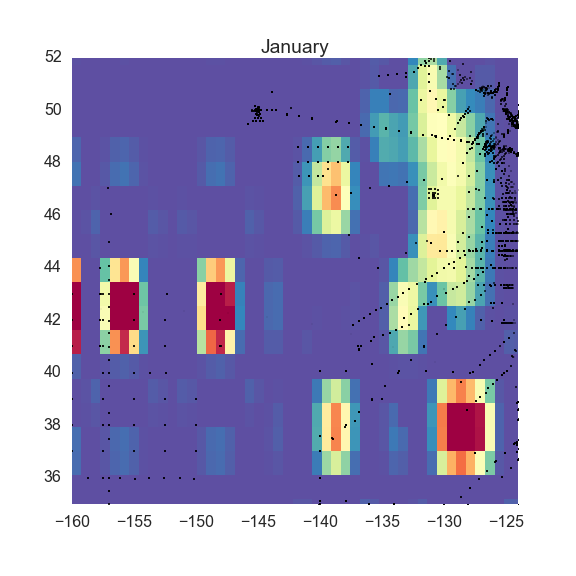
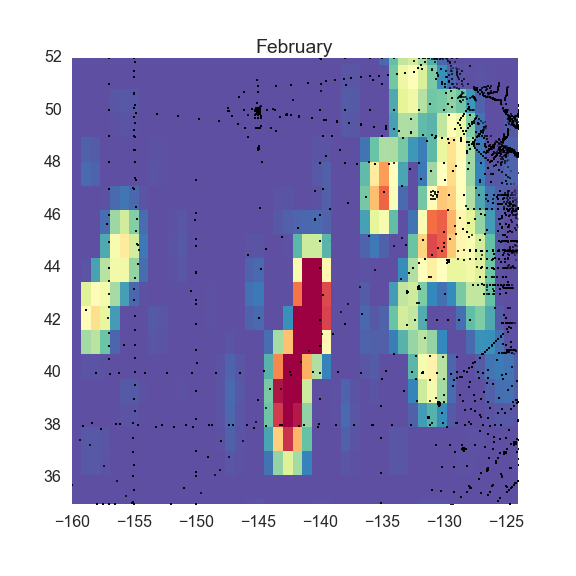
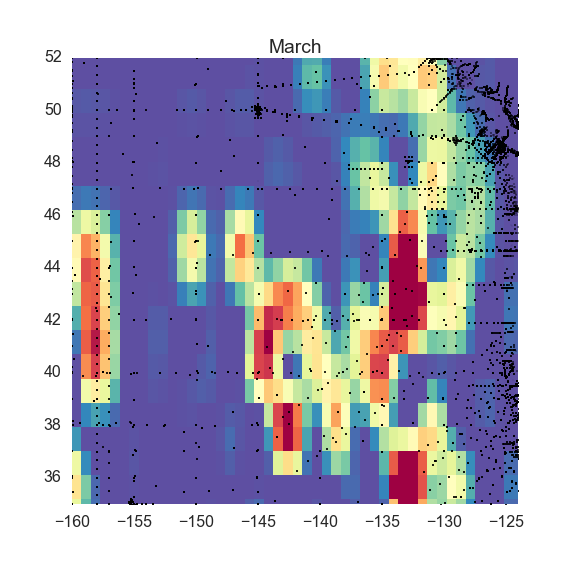
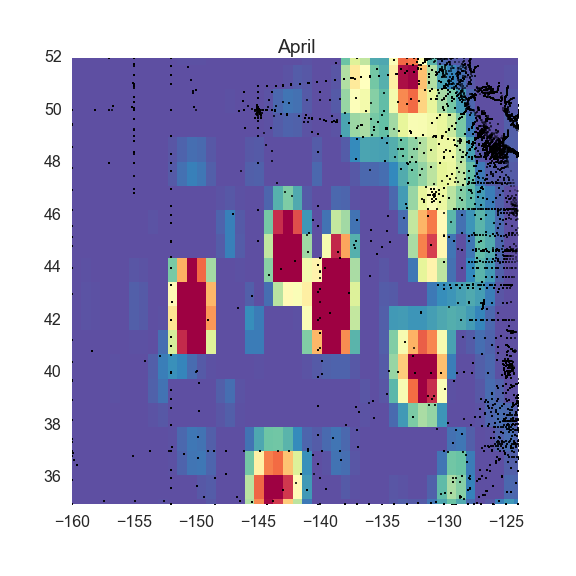
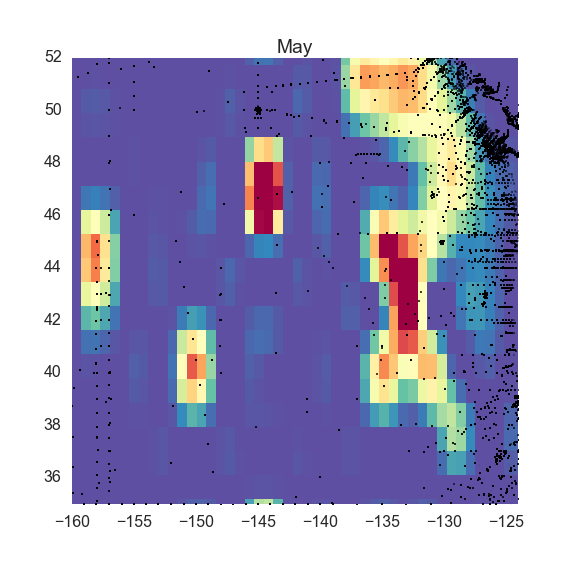
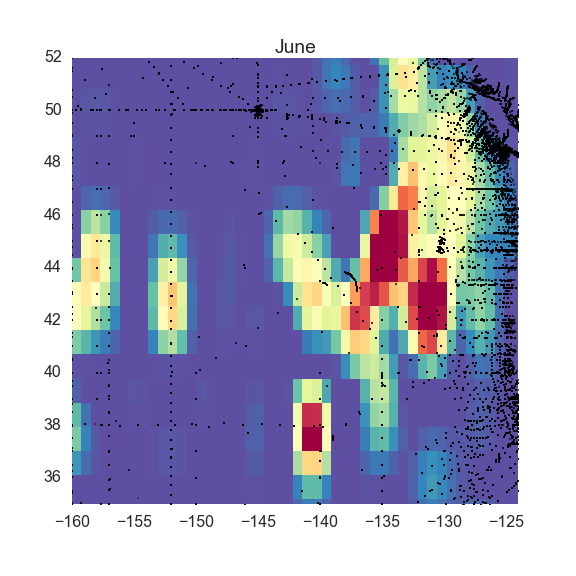
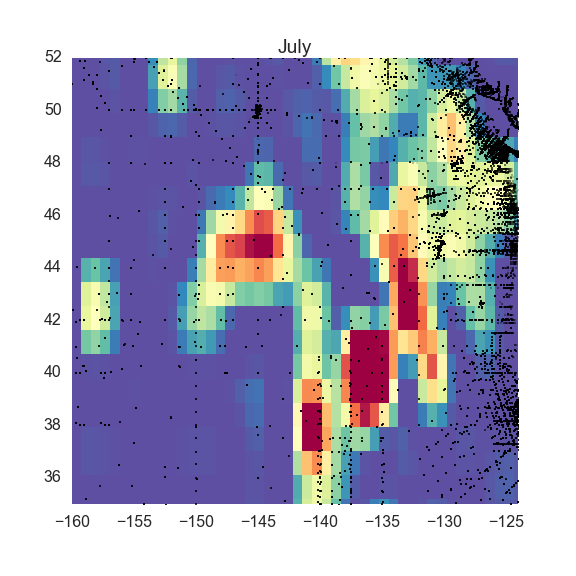
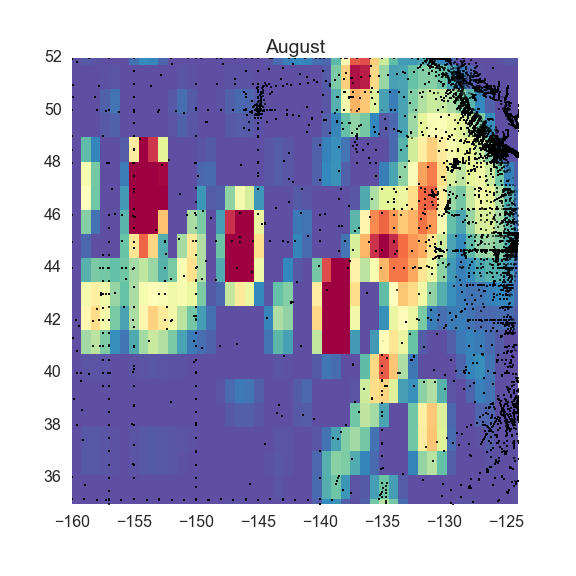
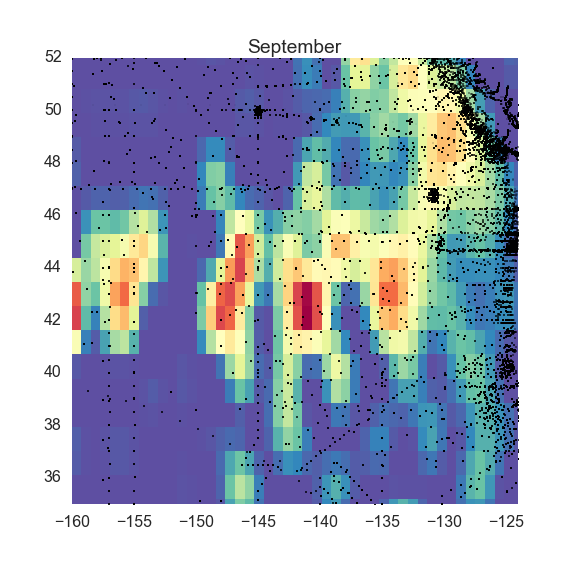
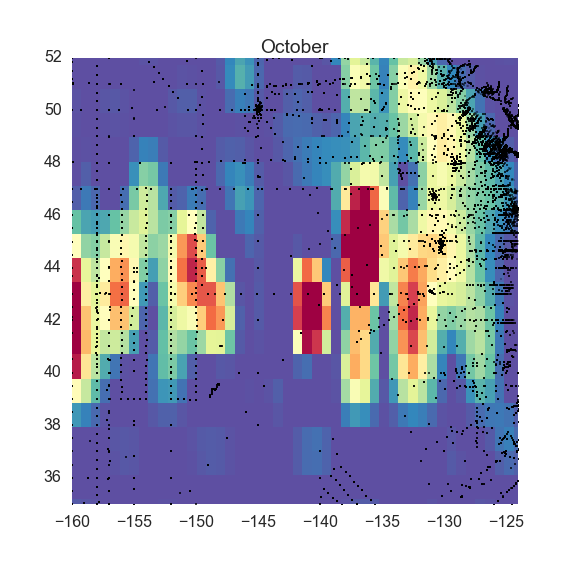
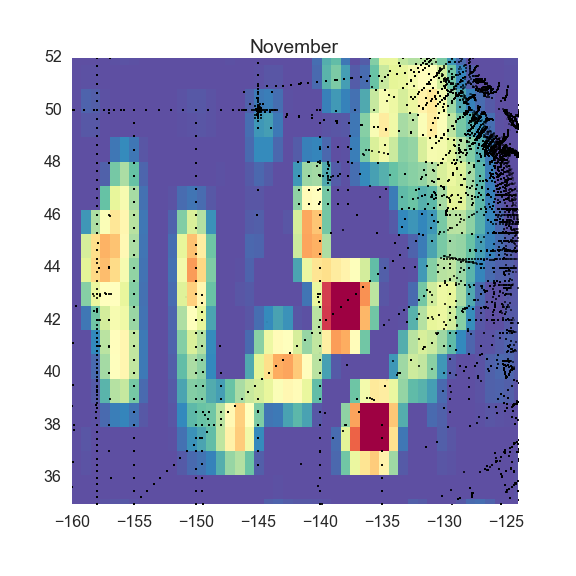
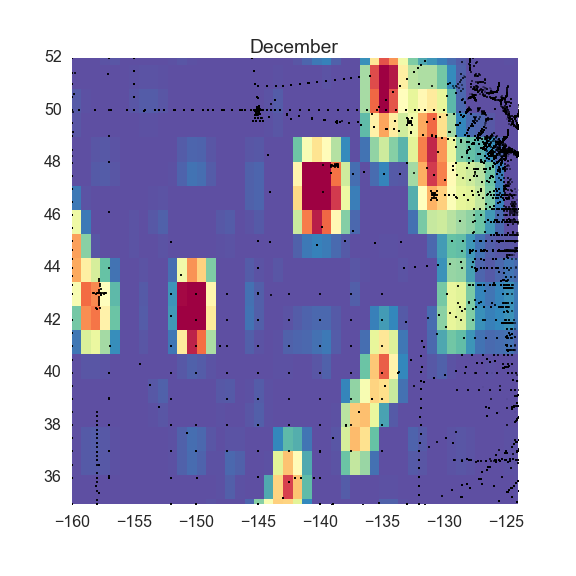

In [61]:
from matplotlib import animation
from JSAnimation import IPython_display

from scipy import interpolate


fig = plt.figure(figsize=(8,8))
ax = plt.axes(xlim=(30,35), ylim=(2,18))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    f = interpolate.interp2d(lon_bins[0:-1], lat_bins[0:-1], H2d_match[i-1].transpose(), kind='cubic')
    LON_hr = np.linspace(-160,-122,50)
    LAT_hr = np.linspace(15,60,50)
    H2d_hr = f(LON_hr,LAT_hr)
    
    ax.cla()
    #ax.contour(tDat['lon'],tDat['lat'],tDat['dpth'],levels=[0,-100,-200,-500,-1000],linewidths=1,colors='k')
    #ax.plot(all_filt['ALL']['lons'],all_filt['ALL']['lats'],'.k',ms=2,alpha=0.025)
    ax.plot(mnthEW_inf[i-1]['ALL']['lons'],mnthEW_inf[i-1]['ALL']['lats'],'.k',ms=1,alpha=1)
    #ax.pcolor(lon_bins[0:-1],lat_bins[0:-1],H2d_match[i-1].transpose(),cmap='Spectral_r',vmin=0,vmax=0.01)
    ax.pcolor(LON_hr,LAT_hr,H2d_hr,cmap='Spectral_r',vmin=0,vmax=0.007)
    ax.set_title(calendar.month_name[i+1])
    ax.set_xlim((-160,-124))
    ax.set_ylim((35,52))
    return line,

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=12,interval=500)

In [44]:
import scipy.io as sio

def getTopo():
    topo=sio.loadmat('/ocean/rirwin/2_FALKOR_Data/3_Repo/topo/SouthVIgrid.mat')
    
    tDat = {'lon' : [], 'lat' : [], 'dpth' : []}
    
    tDat['lon'] = np.squeeze(np.array(topo['SouthVIgrid']['lon'][0][0]))
    tDat['lat'] = np.squeeze(np.array(topo['SouthVIgrid']['lat'][0][0]))
    tDat['dpth'] = np.squeeze(np.array(topo['SouthVIgrid']['depth'][0][0]))
    
    return tDat


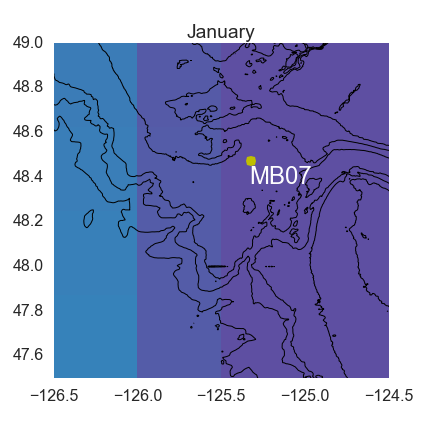
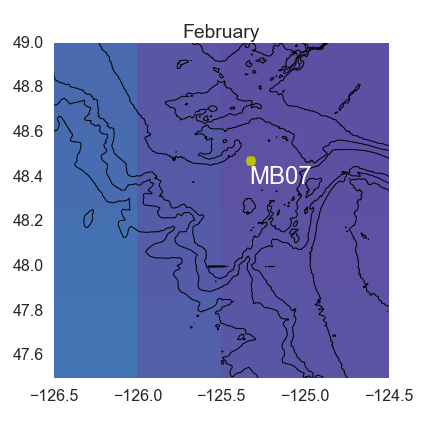
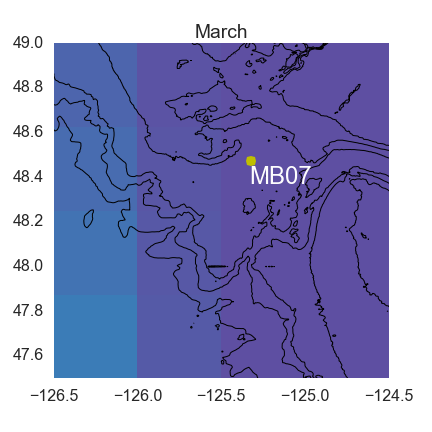
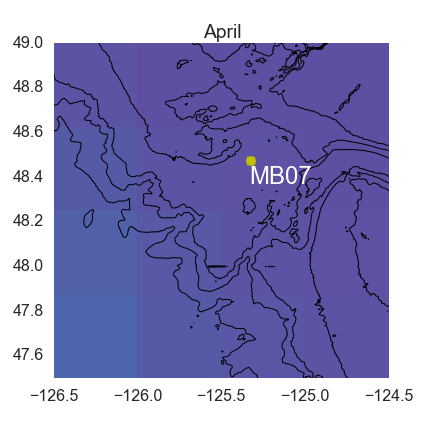
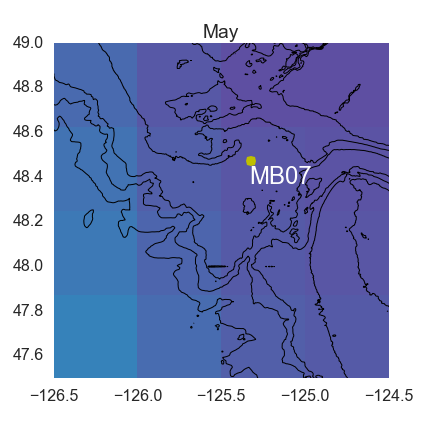
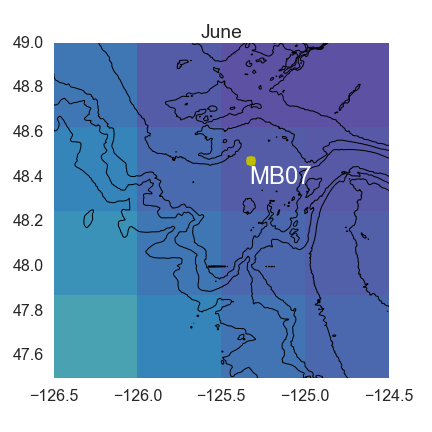
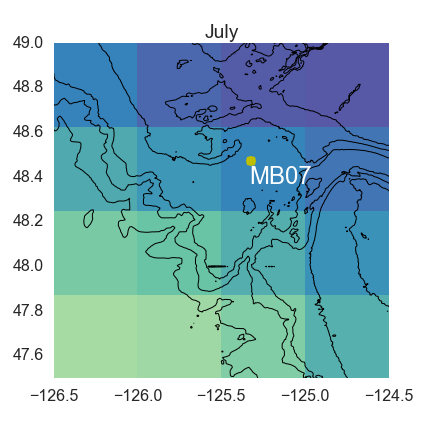
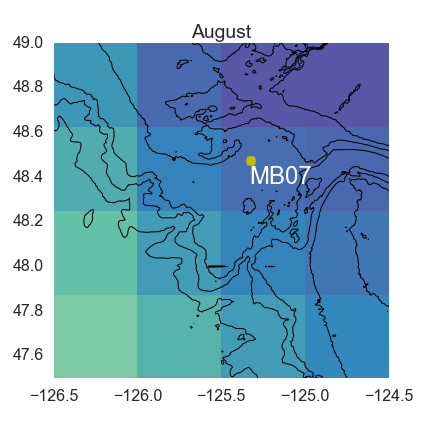
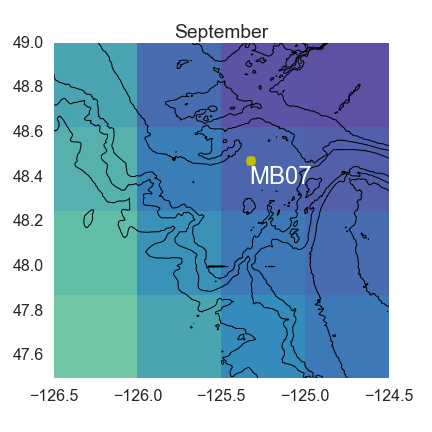
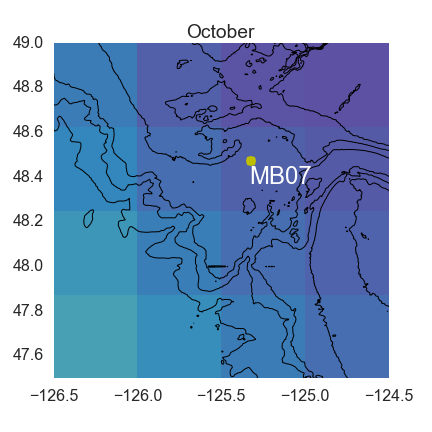
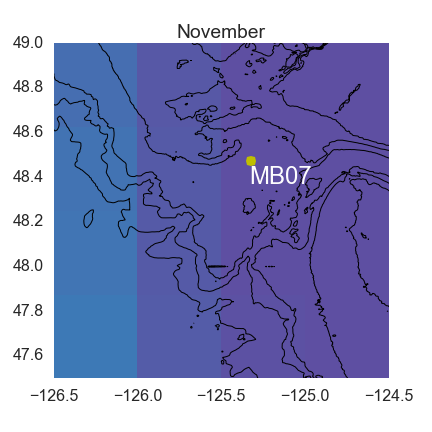
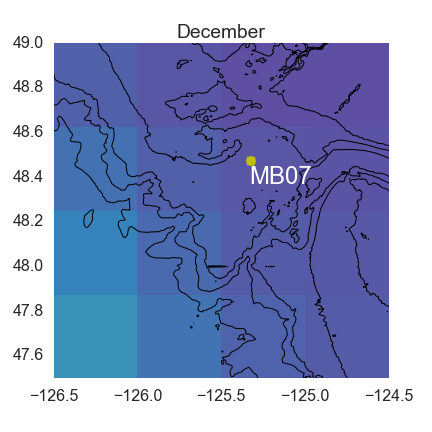

In [62]:
from matplotlib import animation
from JSAnimation import IPython_display

from scipy import interpolate

tDat = getTopo()

fig = plt.figure(figsize=(6,6))
ax = plt.axes(xlim=(30,35), ylim=(2,18))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    f = interpolate.interp2d(lon_bins[0:-1], lat_bins[0:-1], H2d_match[i-1].transpose(), kind='linear')
    LON_hr = np.linspace(-126.5,-124.5,5)
    LAT_hr = np.linspace(47.5,49,5)
    H2d_hr = f(LON_hr,LAT_hr)
    
    ax.cla()
    ax.contour(tDat['lon'],tDat['lat'],tDat['dpth'],levels=[0,-100,-200,-500,-1000],linewidths=1,colors='k',linestyles='-')
    ax.plot(all_filt['ALL']['lons'],all_filt['ALL']['lats'],'.k',ms=2,alpha=0.0025)
    ax.plot(MB07[0],MB07[1]+0.1,'oy',ms=10)
    ax.annotate(s='MB07',xy=(MB07[0],MB07[1]),fontsize=24,color='w')
    #ax.pcolor(lon_bins[0:-1],lat_bins[0:-1],H2d_match[i-1].transpose(),cmap='Spectral_r',vmin=0,vmax=0.007)
    ax.pcolor(LON_hr,LAT_hr,H2d_hr,cmap='Spectral_r',vmin=0,vmax=0.007)
    ax.set_title(calendar.month_name[i+1])
    ax.set_xlim((-126.5,-124.5))
    ax.set_ylim((47.5,49))
    return line,

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=12,interval=500)

The eddy water doesn't appear around MB07 until May. This is a two month delay when compared to the approximate current switch, and suggested upwelling start. Additionally, the eddy water remains in the region until October, one month after the typical end to upwelling season.

Interpreting this very coarse approximation to EW dynamics, it appears that offshore water comes onto the shelf south of the eddy region, and is advected north, possibly by the CUC; although the water does not originate from the CUC.

This animation is interpolated from a $12\times 12$ grid onto a $50 \times 50$ grid for viewability. There is a significant sparsity of casts in Jan and Dec in the southernmost regions of the domain.

Long Term Trends
==========

What can we say about the climatology of EW in the region? Knowing that the Mackas values for the CUC have changed between 1987-present, it can likely be assumed that the properties of the JdF eddy have changed as well. However, we can try and investigate how prevalent the presence of EW is.

In [46]:
MIN_YEAR = 1960
MAX_YEAR = 2014 # 2009 is the most recent year with available data, need to get updated WOD set

yrER_filt = [[] for k in range(MIN_YEAR,MAX_YEAR+1)]
yrWCVI_filt = [[] for k in range(MIN_YEAR,MAX_YEAR+1)]
yrWCUS_filt = [[] for k in range(MIN_YEAR,MAX_YEAR+1)]

# look at monthly values/percentages/stats for each month
for jj,ii in enumerate(range(MIN_YEAR,MAX_YEAR+1)):
    ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_year(ER_cinf,ii),EPS=0.05)
    yrER_filt[jj] = copy.copy(EW_TS)
    yrER_filt[jj]['count'] = len(ALL['lats'])
    if len(ALL['lats']) > 0:
        yrER_filt[jj]['match_perc'] = float(len(EW_TS['lats']))/float(len(ALL['lats']))
    else:
        yrER_filt[jj]['match_perc'] = 0.0
    
    ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_year(WCVI_cinf,ii),EPS=0.05)
    yrWCVI_filt[jj] = copy.copy(EW_TS)
    yrWCVI_filt[jj]['count'] = len(ALL['lats'])
    if len(ALL['lats']) > 0:
        yrWCVI_filt[jj]['match_perc'] = float(len(EW_TS['lats']))/float(len(ALL['lats']))
    else:
        yrWCVI_filt[jj]['match_perc'] = 0.0

    ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_year(WCUS_cinf,ii),EPS=0.05)
    yrWCUS_filt[jj] = copy.copy(EW_TS)
    yrWCUS_filt[jj]['count'] = len(ALL['lats'])
    if len(ALL['lats']) > 0:
        yrWCUS_filt[jj]['match_perc'] = float(len(EW_TS['lats']))/float(len(ALL['lats']))
    else:
        yrWCUS_filt[jj]['match_perc'] = 0.0

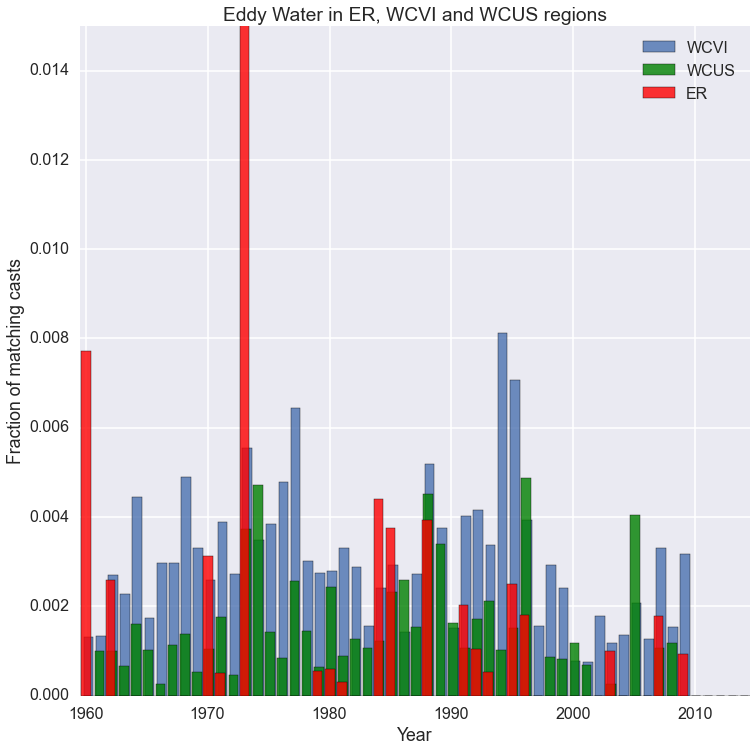

Correlation coefficients for mean EW freq
Corr(WCUS,WCVI) :  0.46309197243
Corr(ER,  WCVI) :  0.247454401652
Corr(ER,  WCUS) :  0.2837986203

Correlation between available casts and EW frequency:
0.0157474489129


In [47]:
plt.figure(figsize=(12,12))

WCVI_freq = [k['match_perc'] for k in yrWCVI_filt] 
WCUS_freq = [k['match_perc'] for k in yrWCUS_filt]
ER_freq = [k['match_perc'] for k in yrER_filt]

plt.bar(np.arange(MIN_YEAR,MAX_YEAR+1)-0.2, WCVI_freq, label='WCVI',alpha=0.8)
plt.bar(np.arange(MIN_YEAR,MAX_YEAR+1)-0.3, WCUS_freq, label='WCUS',color='g',alpha=0.8)
plt.bar(np.arange(MIN_YEAR,MAX_YEAR+1)-0.4, ER_freq, label='ER',alpha=0.8,color='r')

plt.xlim((MIN_YEAR-0.5,MAX_YEAR+0.5))
plt.ylim((0,.015))
plt.legend()
plt.xlabel('Year')
plt.ylabel('Fraction of matching casts')
plt.title('Eddy Water in ER, WCVI and WCUS regions')


#ax = plt.twinx()
#ax.semilogy(np.arange(MIN_YEAR,MAX_YEAR+1),[k['count'] for k in yrER_filt],'ok',lw=5)

plt.show()

yrER_casts_avail = [k['count'] for k in yrER_filt]

# ## ALSO LOOK AT THE CORRELATION BETWEEN CURVES
print "Correlation coefficients for mean EW freq"
print "==========================================="
print "Corr(WCUS,WCVI) : ", np.corrcoef(WCUS_freq,WCVI_freq)[1,0]
print "Corr(ER,  WCVI) : ", np.corrcoef(ER_freq,WCVI_freq)[1,0]
print "Corr(ER,  WCUS) : ", np.corrcoef(ER_freq,WCUS_freq)[1,0]
print ""
print "Correlation between available casts and EW frequency:"
print np.corrcoef(yrER_casts_avail,ER_freq)[1,0]

The correlation between all values here seems insignificant. Notably, there is no correlation between available casts and EW frequency -- this implies that the years where there is "no eddy water" (red bars vanish), it's not from lack of data, but a real phenomena. This is not terribly surprising, as the values of "eddy water" probably change from year to year. Perhaps it is worth looking at casts around 170m +/- 20m depth in the ER for Jun-Aug of each year to try and get a better idea of how the eddy water values are changing from year-to-year. [maybe a better idea to call it zero-spice water instead of eddy water?]

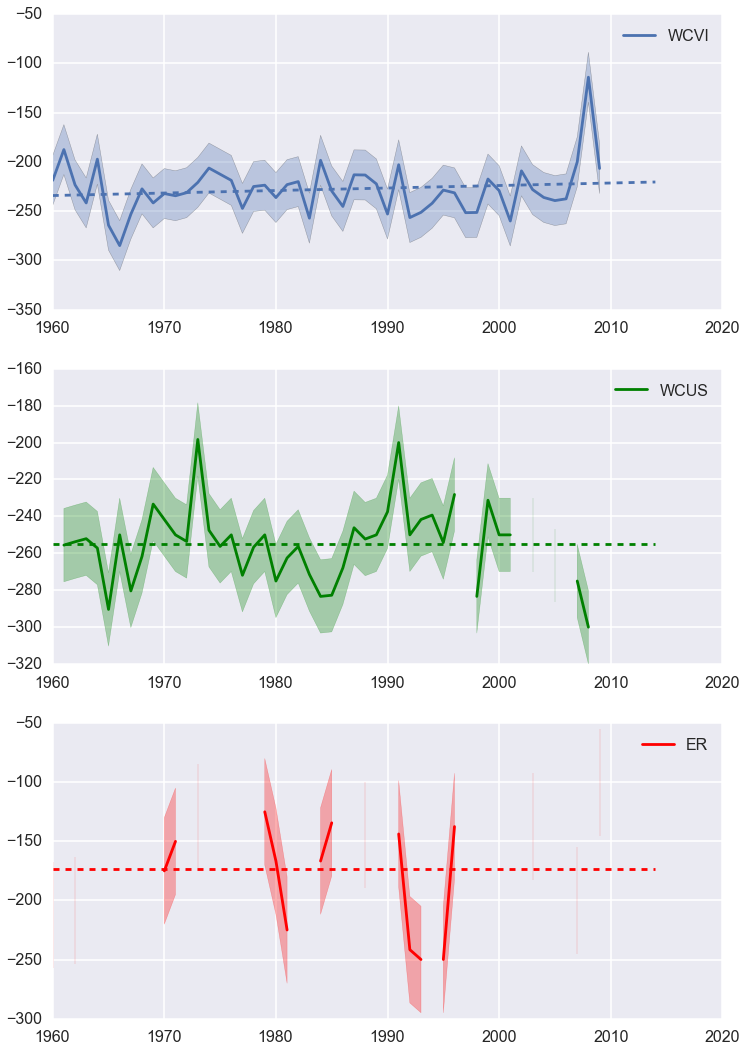

In [48]:
plt.figure(figsize=(12,18))

yrmeanWCVI = np.nanmean([-np.mean(k['dpths']) for k in yrWCVI_filt])
yrmeanWCUS = np.nanmean([-np.mean(k['dpths']) for k in yrWCUS_filt])
yrmeanER = np.nanmean([-np.mean(k['dpths']) for k in yrER_filt])
yrstdWCVI = np.nanstd([-np.mean(k['dpths']) for k in yrWCVI_filt])
yrstdWCUS = np.nanstd([-np.mean(k['dpths']) for k in yrWCUS_filt])
yrstdER = np.nanstd([-np.mean(k['dpths']) for k in yrER_filt])

plt.subplot(3,1,1)
plt.plot(np.arange(MIN_YEAR,MAX_YEAR+1), [-np.mean(k['dpths']) for k in yrWCVI_filt], label='WCVI')
plt.gca().set_color_cycle(None)
plt.fill_between(np.arange(MIN_YEAR,MAX_YEAR+1),[-np.mean(k['dpths']) for k in yrWCVI_filt]-yrstdWCVI,[-np.mean(k['dpths']) for k in yrWCVI_filt]+yrstdWCVI,alpha=0.3)
plt.gca().set_color_cycle(None)

xx = np.arange(MIN_YEAR,MAX_YEAR+1)
yy = np.array([-np.mean(k['dpths']) for k in yrWCVI_filt])
idx = np.isfinite(xx) & np.isfinite(yy)
p = np.polyfit(xx[idx], yy[idx],1)
plt.plot(xx,p[0]*xx+p[1],'--')
#plt.plot(np.arange(MIN_YEAR,MAX_YEAR+1), [yrmeanWCVI for k in np.arange(MIN_YEAR,MAX_YEAR+1)],'--')


plt.legend()

plt.subplot(3,1,2)
plt.plot(np.arange(MIN_YEAR,MAX_YEAR+1), [-np.mean(k['dpths']) for k in yrWCUS_filt], label='WCUS',color='g')
plt.fill_between(np.arange(MIN_YEAR,MAX_YEAR+1),[-np.mean(k['dpths']) for k in yrWCUS_filt]-yrstdWCUS,[-np.mean(k['dpths']) for k in yrWCUS_filt]+yrstdWCUS,color='g',alpha=0.3)
plt.plot(np.arange(MIN_YEAR,MAX_YEAR+1), [yrmeanWCUS for k in np.arange(MIN_YEAR,MAX_YEAR+1)],'--g')
plt.legend()

plt.subplot(3,1,3)
plt.plot(np.arange(MIN_YEAR,MAX_YEAR+1), [-np.mean(k['dpths']) for k in yrER_filt], label='ER',color='r')
plt.fill_between(np.arange(MIN_YEAR,MAX_YEAR+1),[-np.mean(k['dpths']) for k in yrER_filt]-yrstdER,[-np.mean(k['dpths']) for k in yrER_filt]+yrstdER,color='r',alpha=0.3)
plt.plot(np.arange(MIN_YEAR,MAX_YEAR+1), [yrmeanER for k in np.arange(MIN_YEAR,MAX_YEAR+1)],'--r')
plt.legend()
plt.show()


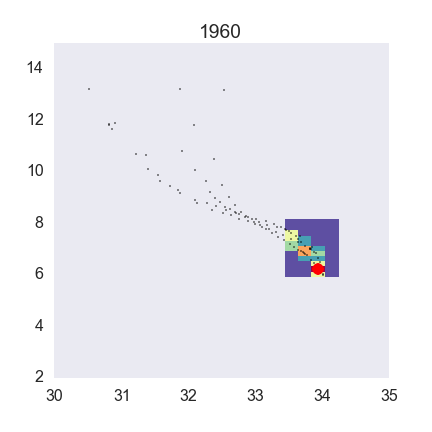
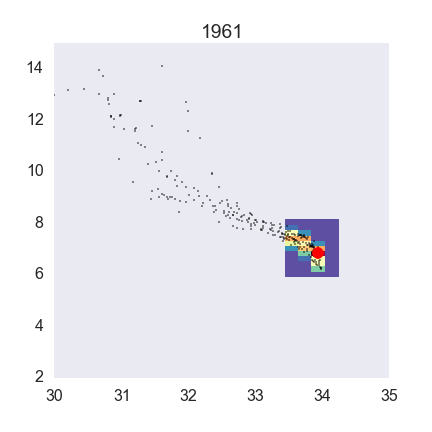
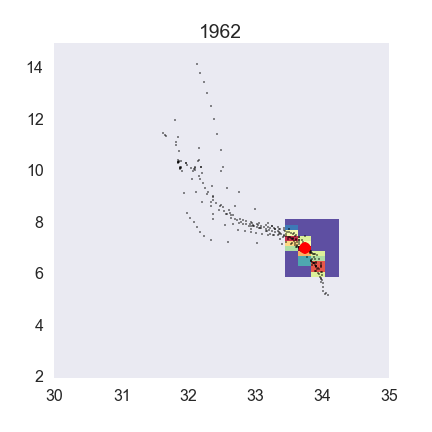
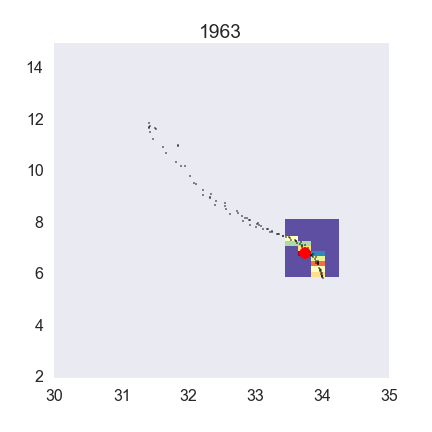
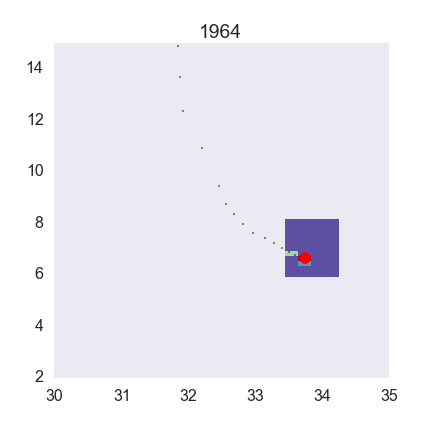
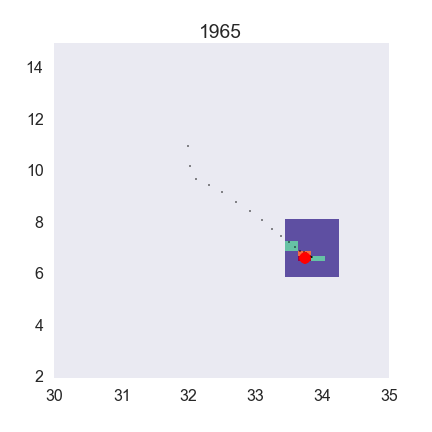
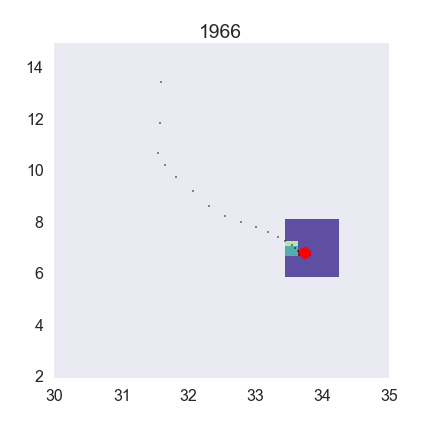
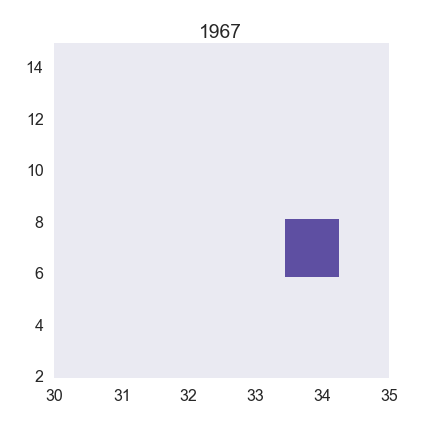
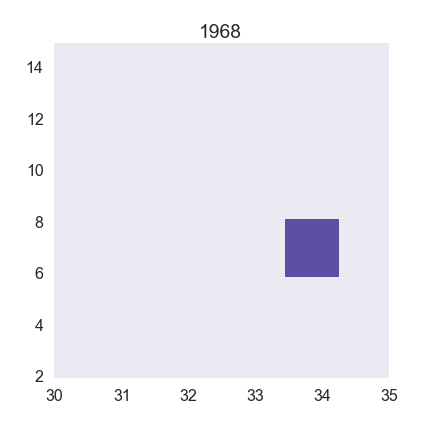
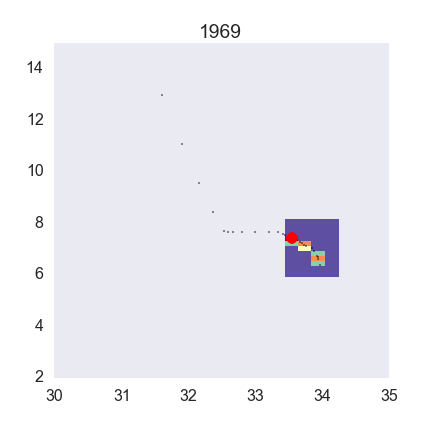
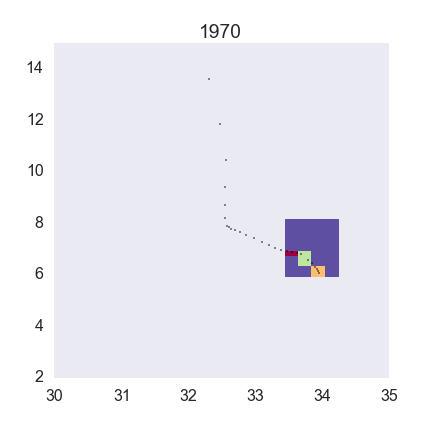
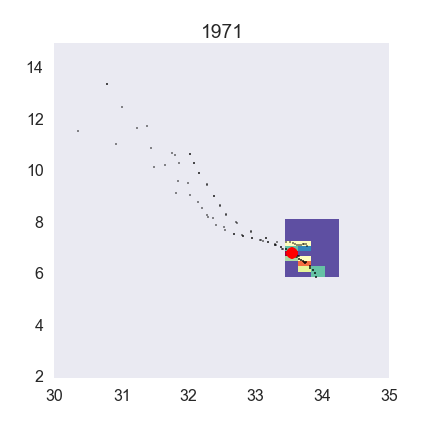
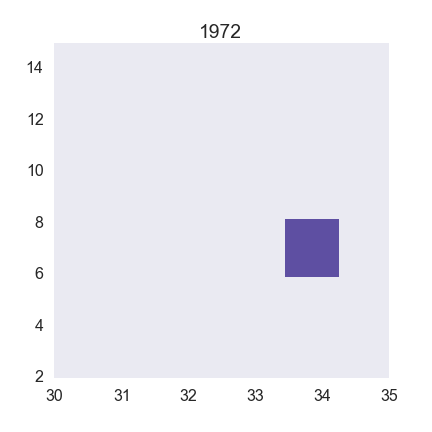
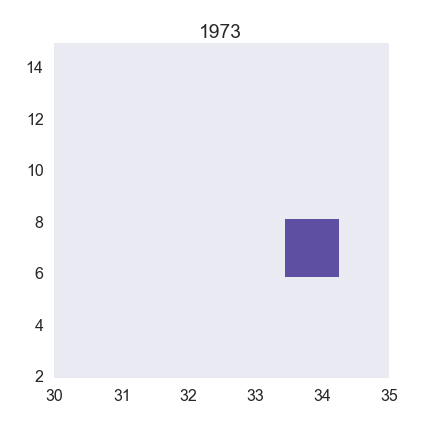
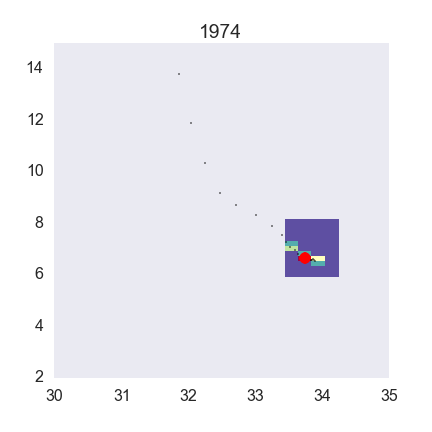
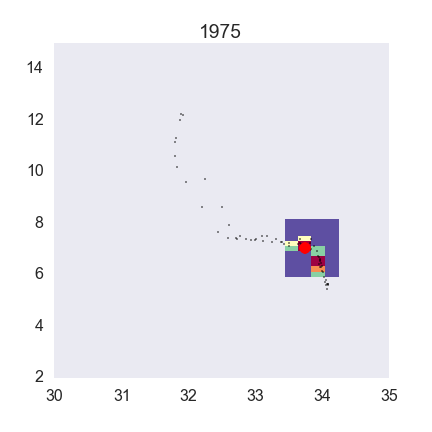
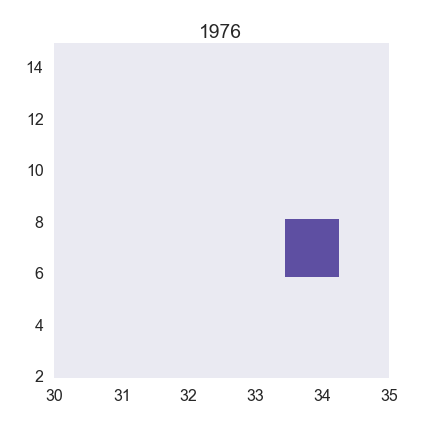
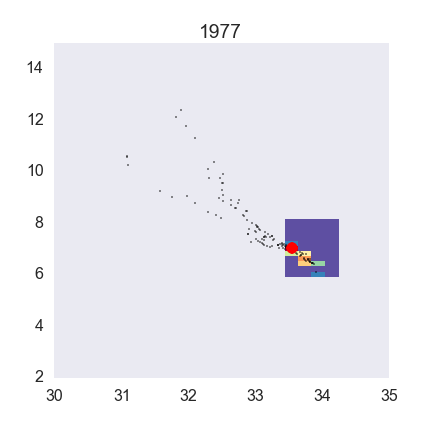
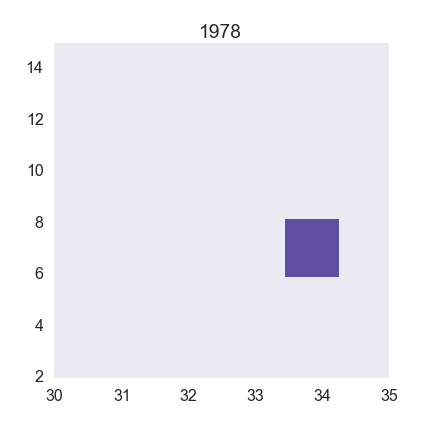
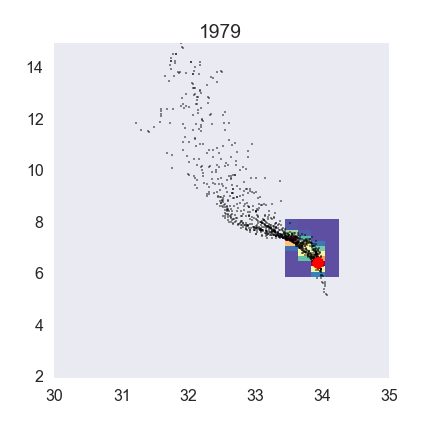
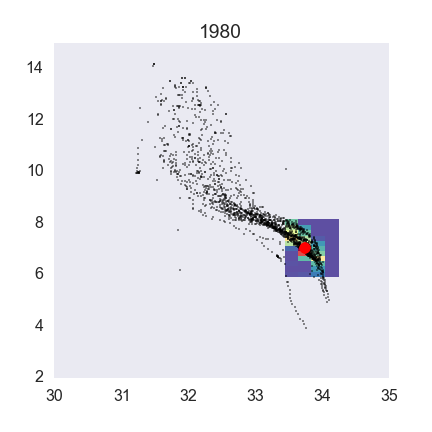
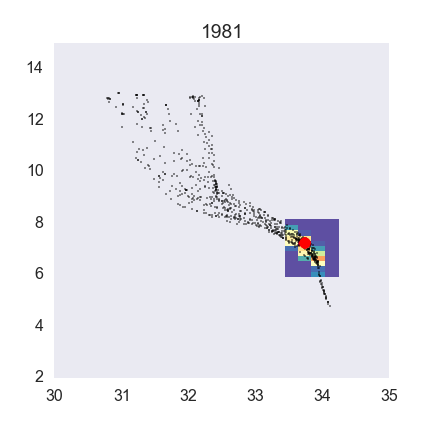
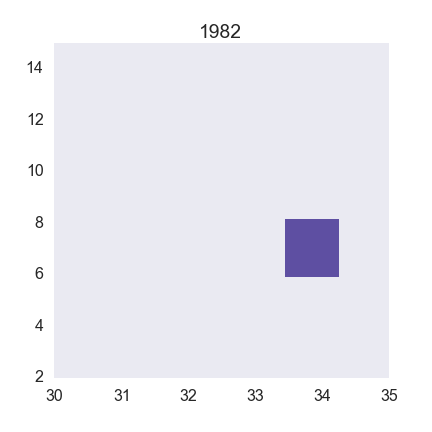
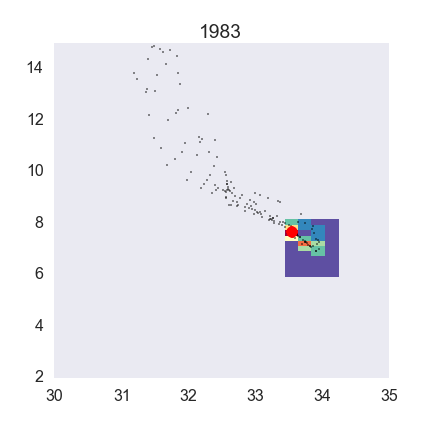
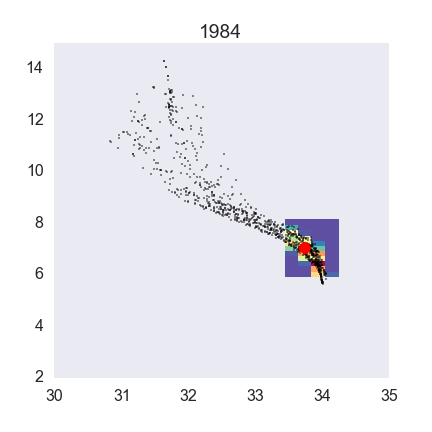
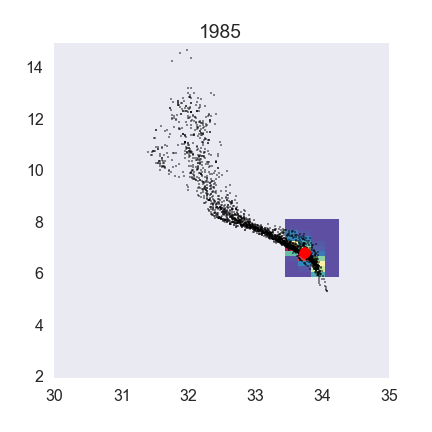
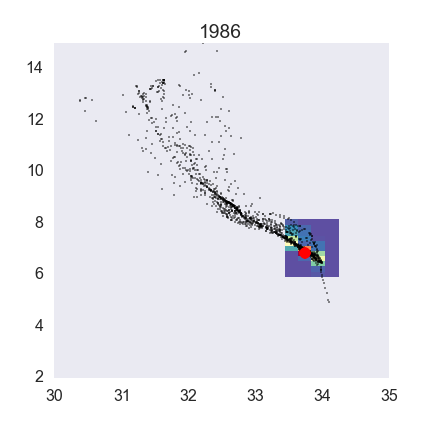
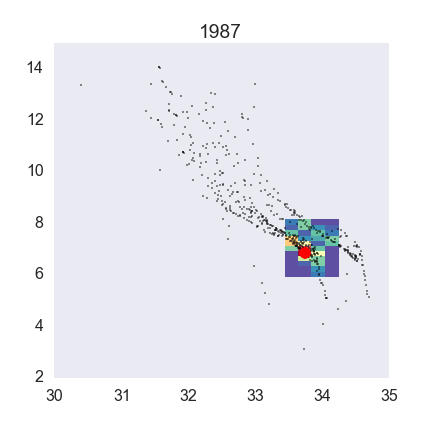
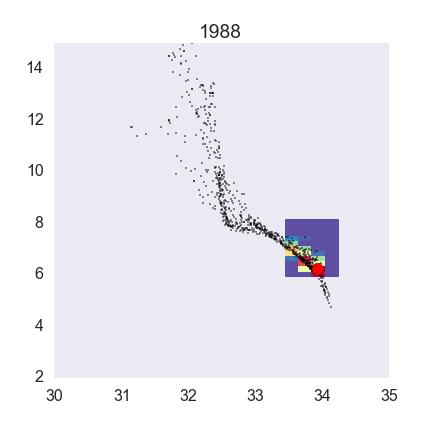
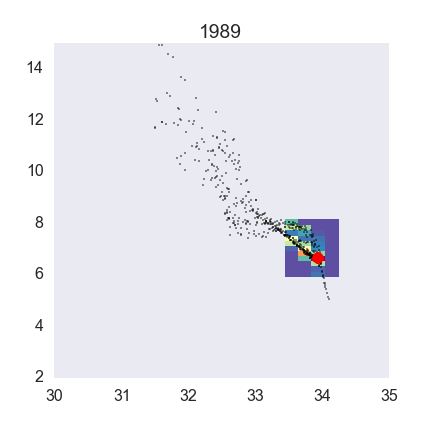
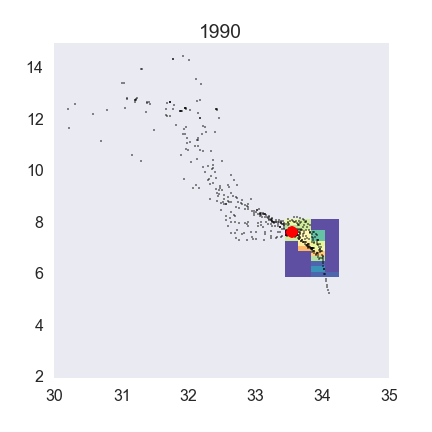
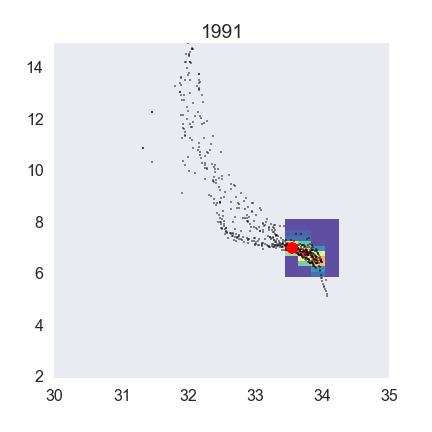
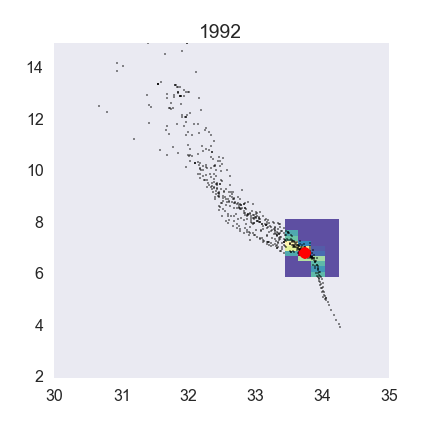
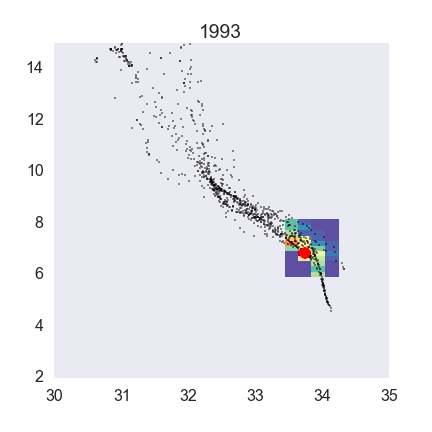
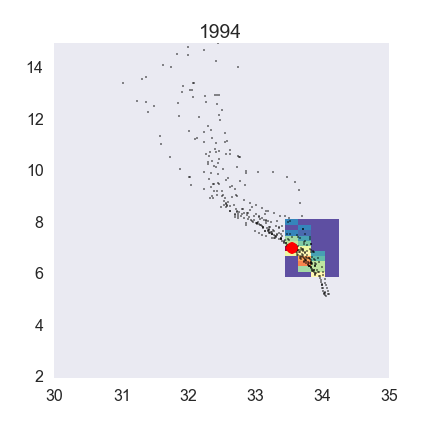
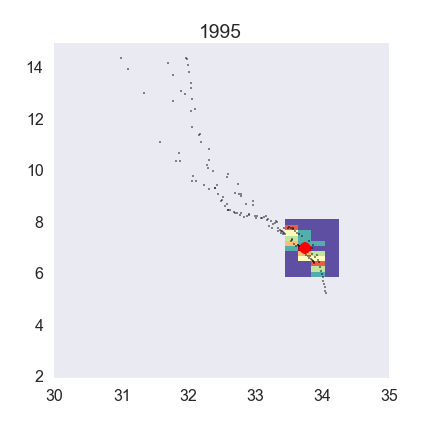
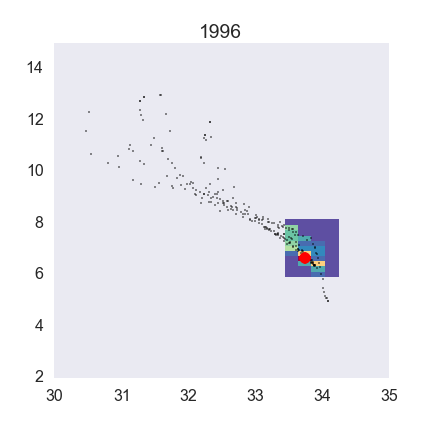
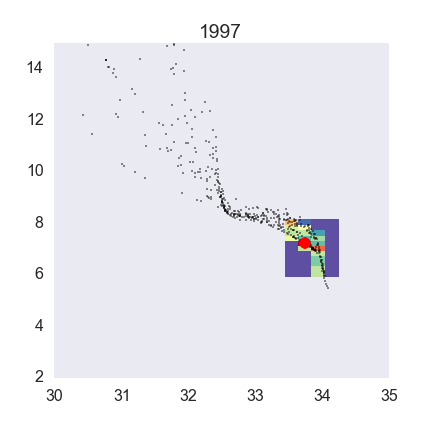
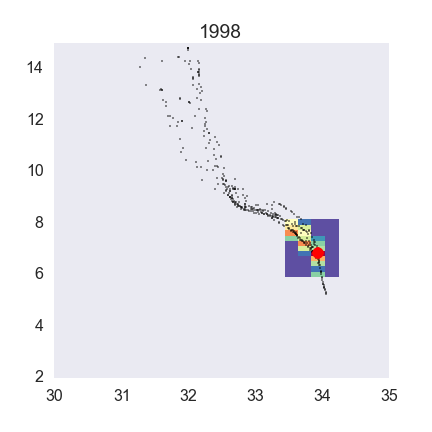
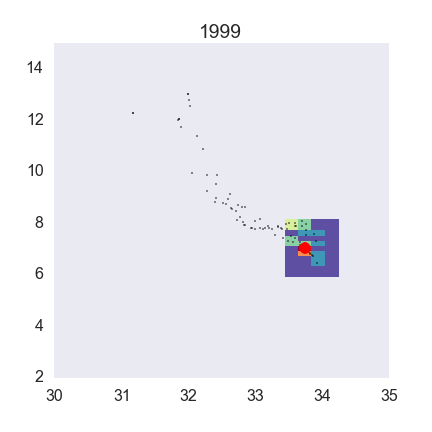
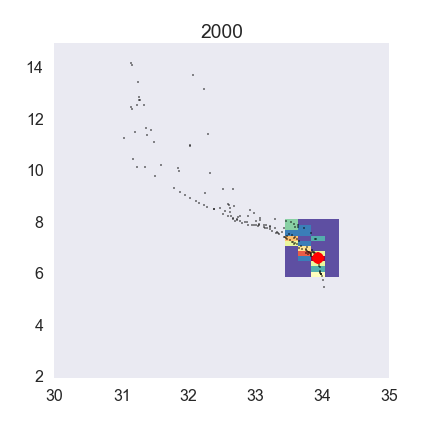
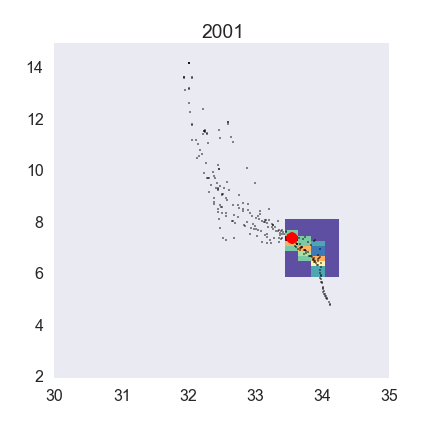
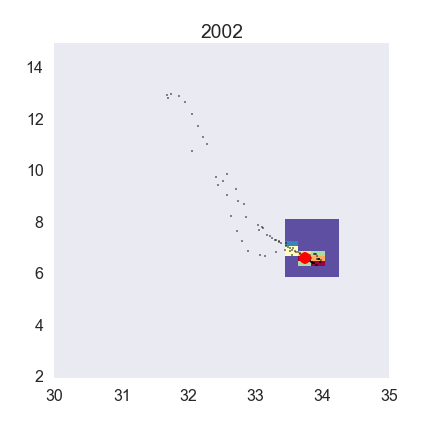
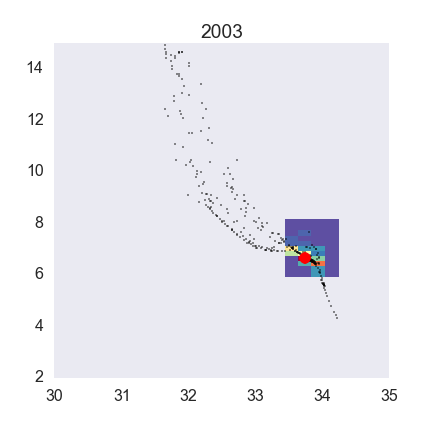
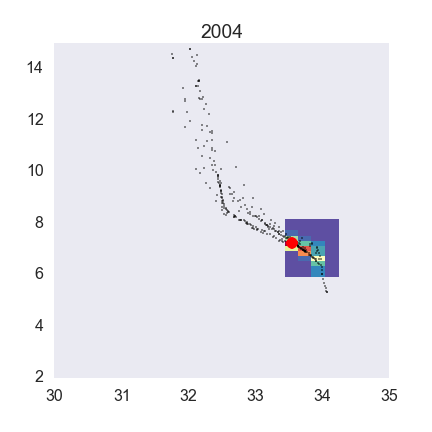
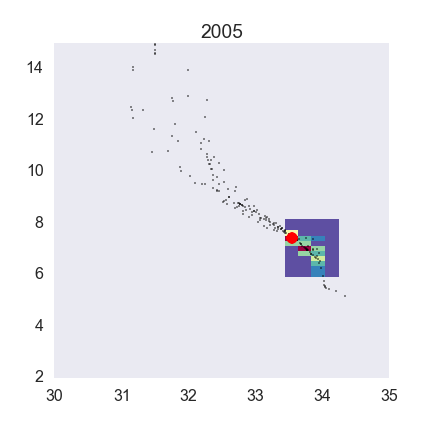
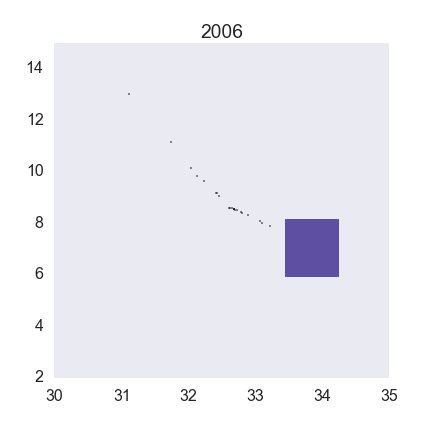
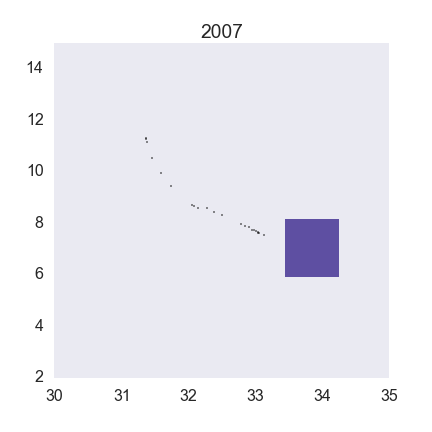
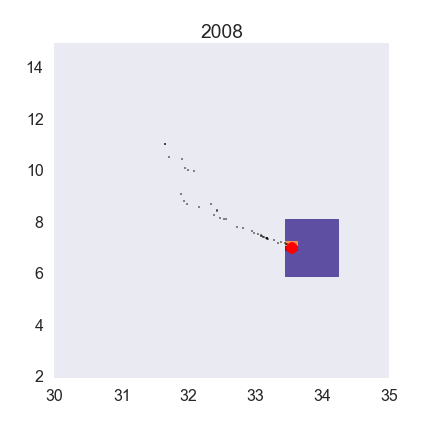
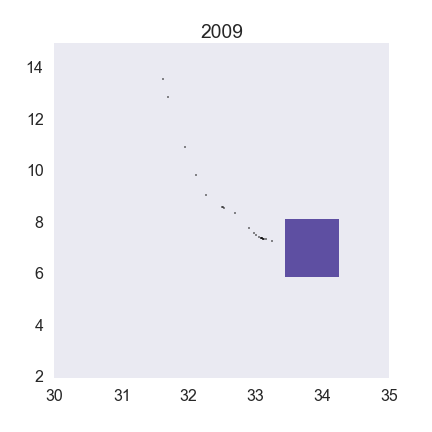
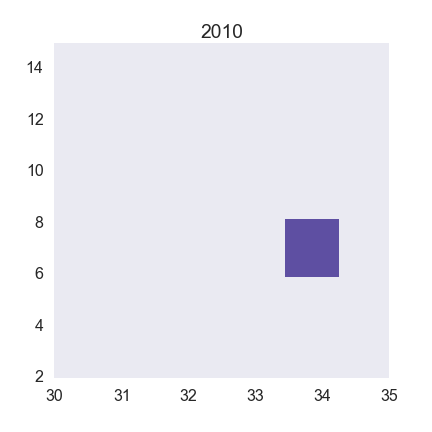
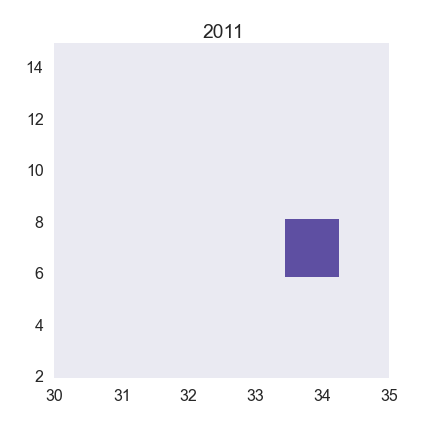
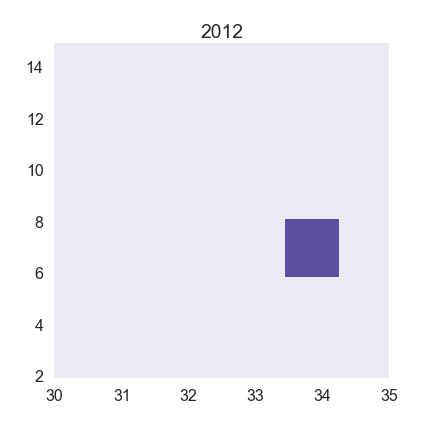
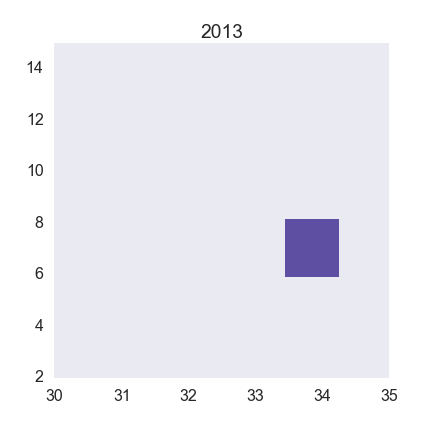
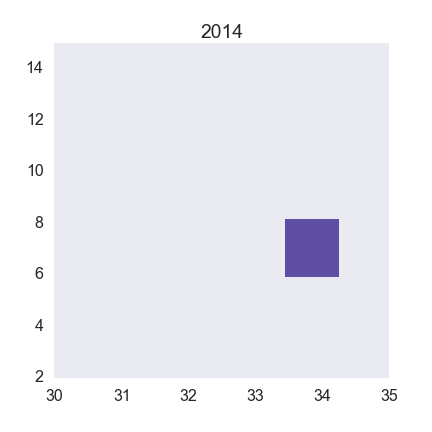

In [167]:
from matplotlib import animation
from JSAnimation import IPython_display

fig = plt.figure(figsize=(6,6))
ax = plt.axes(xlim=(30,35), ylim=(2,18))
line, = ax.plot([], [], lw=2)

# TAKE IN ER REGION FOR JUN-AUG DATA
ER_cast_inf = csvWOD.csvWOD_filter_month(csvWOD.csvWOD_filter_region(cast_inf,min(ER_x),max(ER_x),min(ER_y),max(ER_y)),6,8)
yrER_cast_inf = [[] for k in range(MIN_YEAR,MAX_YEAR+1)]

# SORT INTO YEARS
for ii in range(MIN_YEAR,MAX_YEAR+1):
    for jj in ER_cast_inf:
        if jj['Year'] == ii and 'Salinity' in jj and 'Temperatur' in jj and len(jj['Depth']) > 1 and max(jj['Depth']) > 100:
            yrER_cast_inf[ii-MIN_YEAR].append(jj)

yearER_T = [[] for k in range(MIN_YEAR,MAX_YEAR+1)]
yearER_S = [[] for k in range(MIN_YEAR,MAX_YEAR+1)]
for ii in range(MIN_YEAR,MAX_YEAR+1):
    yearER_T[ii-MIN_YEAR] = [k['Temperatur'] for k in yrER_cast_inf[ii-MIN_YEAR]]
    yearER_T[ii-MIN_YEAR] = [x for sublist in yearER_T[ii-MIN_YEAR] for x in sublist]
    
    yearER_S[ii-MIN_YEAR] = [k['Salinity'] for k in yrER_cast_inf[ii-MIN_YEAR]]
    yearER_S[ii-MIN_YEAR] = [x for sublist in yearER_S[ii-MIN_YEAR] for x in sublist]

Tbins = np.arange(5.95,8.451,0.2)
Sbins = np.arange(33.45,34.551,0.2)

Ty = (Tbins[0:-1]+Tbins[1:])/2
Sx = (Sbins[0:-1]+Sbins[1:])/2

histTS = []

yrEW_T = []
yrEW_S = []

for ii in range(MIN_YEAR,MAX_YEAR+1):
    hist_tmp = np.histogram2d(yearER_S[ii-MIN_YEAR],yearER_T[ii-MIN_YEAR],bins=[Sbins,Tbins])[0]
    IND = np.unravel_index(hist_tmp.argmax(), hist_tmp.shape)
    if hist_tmp[IND[0],IND[1]] > 3:
        yrEW_S.append(Sx[IND[-2]])
        yrEW_T.append(Ty[IND[-1]])
    else:
        yrEW_S.append(np.nan)
        yrEW_T.append(np.nan)
    histTS.append(hist_tmp)
    
def init():
    line.set_data([], [])
    return line,

def animate(i):
    ax.cla()
    ax.plot(yearER_S[i],yearER_T[i],'.k',ms=3)
    ax.pcolor(Sbins[:-1],Tbins[:-1],histTS[i].transpose(),cmap='Spectral_r')
    ax.plot(yrEW_S[i],yrEW_T[i],'or')
    ax.set_title(MIN_YEAR+i)
    ax.set_xlim((30,35))
    ax.set_ylim((2,15))
    return line,

animation.FuncAnimation(fig, animate, init_func=init,frames=len(yrER_cast_inf),interval=500)

How do the eddy water properties change over time? Well the data is sparse and no trends can really be seen. The dashed lines denote the Falkor 2013 EW, while the solid lines are the data from the previous cell. Note that because we have standard levels, it's more difficult to pick out a distinctly representative eddy water for each year -- maybe experiment with the observed values from WOD?

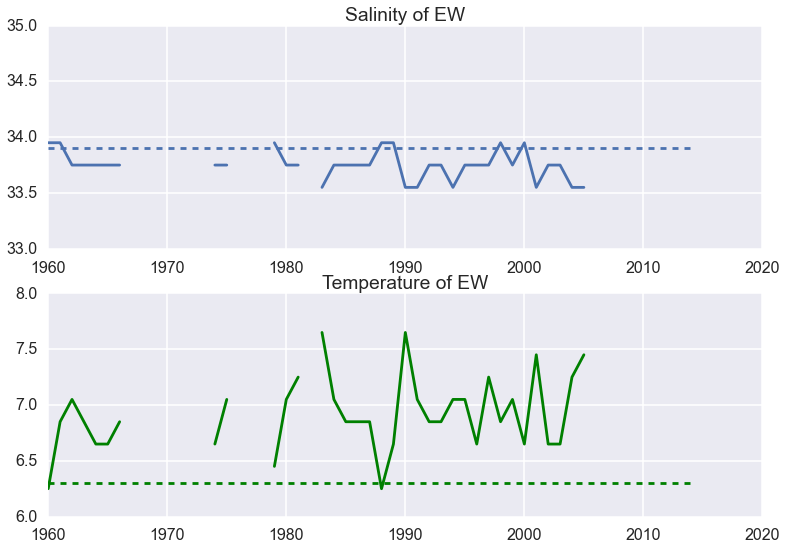

In [169]:
plt.subplot(2,1,1)
plt.plot(np.arange(MIN_YEAR,MAX_YEAR+1),yrEW_S)
plt.gca().set_color_cycle(None)
plt.plot([MIN_YEAR,MAX_YEAR],[33.9,33.9],'--')
plt.ylim((33,35))
plt.title('Salinity of EW')

plt.subplot(2,1,2)
plt.plot(np.arange(MIN_YEAR,MAX_YEAR+1),yrEW_T,'g')
plt.plot([MIN_YEAR,MAX_YEAR],[6.3,6.3],'--g')
plt.ylim((6,8))
plt.title('Temperature of EW')

plt.show()